[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://bit.ly/open-data-05-park-input)


# 전국 도시 공원 표준 데이터
https://www.data.go.kr/dataset/15012890/standard.do
* 전국 도시 공원 표준데이터에는 데이터를 전처리 해보기에 좋은 데이터가 많습니다.
* 시간, 결측치, 이상치, 수치형, 범주형 데이터를 고르게 볼 수 있으며 다양한 텍스트 데이터 처리를 해볼 수 있습니다.
* 또 정규표현식을 활용해서 텍스트 데이터 전처리와 데이터 마스킹 기법에 대해 다룹니다.
* 그리고 이렇게 전처리한 내용을 바탕으로 전국 도시공원에 대한 분포를 시각화해 봅니다.
* 어떤 공원이 어느 지역에 어떻게 분포되어 있는지를 위경도로 표현해 봅니다.

## 이번 챕터에서 설치가 필요한 도구

* 별도의 설치가 필요합니다.(folium 을 설치했던 것 처럼 따로 설치해야지만 사용할 수 있습니다.)

* 윈도우
    * <font color="red">주피터 노트북 상에서 설치가 되지 않으니</font> anaconda prompt 를 열어서 설치해 주세요.
    * <font color="red">관리자 권한</font>으로 아나콘다를 설치하셨다면 다음의 방법으로 anaconda prompt 를 열어 주세요.
    <img src="https://i.imgur.com/GhoLwsd.png">
* 맥
    * terminal 프로그램을 열어 설치해 주세요. 


### Pandas Profiling
* [pandas-profiling/pandas-profiling: Create HTML profiling reports from pandas DataFrame objects](https://github.com/pandas-profiling/pandas-profiling)

* 2020년 4월 기준 판다스 1.0 이상 버전을 지원하지 않습니다.
* 아나콘다로 주피터를 설치했다면 : `conda install -c conda-forge pandas-profiling`
* pip로 주피터를 설치했다면 : `pip install pandas-profiling`

### 워드클라우드
[amueller/word_cloud: A little word cloud generator in Python](https://github.com/amueller/word_cloud)

* 다음 명령어로 설치가 가능합니다. conda prompt 혹은 터미널을 열어 설치해 주세요.

* conda : `conda install -c conda-forge wordcloud`
* pip : `pip install wordcloud`


## 분석에 사용할 도구를 불러옵니다.

In [1]:
# 필요한 라이브러리를 로드합니다.
# pandas, numpy, seaborn, matplotlib

import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


## Seaborn 설정으로 시각화의 스타일, 폰트 설정하기
* [matplotlib.pyplot.rc — Matplotlib 3.1.3 documentation](https://matplotlib.org/3.1.3/api/_as_gen/matplotlib.pyplot.rc.html)

In [2]:
# seaborn 의 set 기능을 통해 폰트, 마이너스 폰트 설정, 스타일 설정을 합니다. 그 전에는 plt로 설정했음.
# Wind : "Malgun Gothic", MAC:"AppleGothic"

sns.set(font = 'Malgun Gothic', 
        style = 'whitegrid',
       rc = {"axes.unicode_minus" : False})

In [3]:
# 한글폰트 설정 확인을 합니다.
from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")

In [4]:
# 그래프가 선명하게 표시되도록 합니다.



## 데이터 로드

In [5]:
# 데이터를 로드해서 df 라는 변수에 담습니다.

df = pd.read_csv("data/전국도시공원표준데이터.csv", encoding = "cp949")
df.head()

관리번호    공원명   공원구분 소재지도로명주소                 소재지지번주소         위도  \
0  26440-00001   구랑공원   문화공원      NaN    부산광역시 강서구 구랑동 1199-7  35.157215   
1  26440-00002   압곡공원   근린공원      NaN      부산광역시 강서구 구랑동 1219  35.154655   
2  26440-00003  서연정공원    소공원      NaN   부산광역시 강서구 대저1동 1330-7  35.216183   
3  26440-00004   용두공원  어린이공원      NaN  부산광역시 강서구 대저2동 1870-67  35.183679   
4  26440-00005  새동내공원  어린이공원      NaN   부산광역시 강서구 대저2동 2407-1  35.174568   

           경도     공원면적 공원보유시설(운동시설)         공원보유시설(유희시설) 공원보유시설(편익시설)  \
0  128.854935   9137.0            4                  NaN          화장실   
1  128.854727  33756.0            4                  NaN          NaN   
2  128.969558    646.0            7                  NaN          NaN   
3  128.956007   1620.0          NaN           조합놀이기구, 그네          NaN   
4  128.950612   1009.0            8  조합놀이기구, 그네, 흔들놀이기구2          NaN   

  공원보유시설(교양시설)                                       공원보유시설(기타시설)       지정고시일  \
0          NaN  팔각정자, 파고라2, 평의자6, 앉음벽14.38m, 축구장(골대2), 컨테이너, 안...  2011-09-02   
1          NaN  배드민턴장, 족구장, 파고라4, 안내판, 볼라드7, 데크435.11㎡, 데크계단19...  2008-02-28   
2          NaN            앉음벽13.57m, 트렐리스3, 안내판2, 플랜트2, 파고라, 평의자4  2013-01-23   
3          NaN                                      정자, 농구장, 평의자6  1998-07-25   
4          NaN                         정자, 평의자14, 트렐리스2, 안내판, 볼라드  1995-04-07   

              관리기관명          전화번호     데이터기준일자   제공기관코드      제공기관명  Unnamed: 19  
0  부산광역시 강서구청 녹지공원과  051-970-4536  2019-05-02  3360000  부산광역시 강서구          NaN  
1  부산광역시 강서구청 녹지공원과  051-970-4536  2019-05-02  3360000  부산광역시 강서구          NaN  
2  부산광역시 강서구청 녹지공원과  051-970-4536  2019-05-02  3360000  부산광역시 강서구          NaN  
3  부산광역시 강서구청 녹지공원과  051-970-4536  2019-05-02  3360000  부산광역시 강서구          NaN  
4  부산광역시 강서구청 녹지공원과  051-970-4536  2019-05-02  3360000  부산광역시 강서구          NaN

In [6]:
# 미리보기를 합니다.



## Pandas Profiling
* 기술통계값을 요약해주는 리포트, 만드는데 엄청 오래걸리고 용량이 크므로 필요한 데이터만 쓰는 것이 좋다.
* [pandas-profiling/pandas-profiling: Create HTML profiling reports from pandas DataFrame objects](https://github.com/pandas-profiling/pandas-profiling)

* 별도의 설치가 필요합니다.(folium 을 설치했던 것 처럼 따로 설치해야지만 사용할 수 있습니다.)
* conda : `conda install -c conda-forge pandas-profiling`
* pip : `pip install pandas-profiling`

In [6]:
# 버전에 따라 기능의 차이가 있습니다. 
# 이 강좌에서 사용하는 버전은 다음과 같습니다.

import pandas_profiling

pandas_profiling.__version__

'2.10.0'

* 미리 생성해 놓은 리포트 보기 : https://corazzon.github.io/open-data-analysis-basic/05-park_pandas_profile.html

In [8]:
# pandas profiling 에서 폰트가 깨진다면 아래코드의 주석을 풀고 폰트를 재설정 해보세요.
# import matplotlib 
# matplotlib.font_manager._rebuild()

# Win
# plt.rc("font", family="Malgun Gothic")
# Mac
# plt.rc("font", family="AppleGothic")

In [9]:
# pandas_profiling 의 ProfileReport 를 불러와 표현합니다.
# 이 때 title은 "도시공원 표준 데이터" 로 하고 주피터 노트북에서 바로 보면 iframe을 통해 화면이 작게 보이기 때문에
# 별도의 html 파일로 생성해서 그려보세요.

# from pandas_profiling import ProfileReport

# %time profile = ProfileReport(df, title="도시공원 표준 데이터") # time : 시간을 표현해줌
# profile.to_file(output_file="05-park_pandas_profile.html")

## 기본 정보 보기

In [10]:
# info로 기본 정보를 봅니다.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18137 entries, 0 to 18136
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   관리번호          18137 non-null  object 
 1   공원명           18137 non-null  object 
 2   공원구분          18137 non-null  object 
 3   소재지도로명주소      8039 non-null   object 
 4   소재지지번주소       17158 non-null  object 
 5   위도            18137 non-null  float64
 6   경도            18137 non-null  float64
 7   공원면적          18137 non-null  float64
 8   공원보유시설(운동시설)  4845 non-null   object 
 9   공원보유시설(유희시설)  6964 non-null   object 
 10  공원보유시설(편익시설)  5084 non-null   object 
 11  공원보유시설(교양시설)  1160 non-null   object 
 12  공원보유시설(기타시설)  3116 non-null   object 
 13  지정고시일         15225 non-null  object 
 14  관리기관명         17383 non-null  object 
 15  전화번호          16957 non-null  object 
 16  데이터기준일자       18137 non-null  object 
 17  제공기관코드        18137 non-null  object 
 18  제공기관명         18137 non-nu

In [11]:
# 결측치의 수를 구합니다.
df.isna().sum().sort_values()

관리번호                0
공원명                 0
공원구분                0
위도                  0
경도                  0
공원면적                0
제공기관코드              0
제공기관명               0
데이터기준일자             0
관리기관명             754
소재지지번주소           979
전화번호             1180
지정고시일            2912
소재지도로명주소        10098
공원보유시설(유희시설)    11173
공원보유시설(편익시설)    13053
공원보유시설(운동시설)    13292
공원보유시설(기타시설)    15021
공원보유시설(교양시설)    16977
Unnamed: 19     18137
dtype: int64

In [12]:
# 결측치 비율 구하기
# 결측의 평균을 통해 비율을 구하고 100을 곱해줍니다.
round(df.isna().mean().sort_values(ascending = False)*100, 3)

Unnamed: 19     100.000
공원보유시설(교양시설)     93.604
공원보유시설(기타시설)     82.820
공원보유시설(운동시설)     73.287
공원보유시설(편익시설)     71.969
공원보유시설(유희시설)     61.603
소재지도로명주소         55.676
지정고시일            16.056
전화번호              6.506
소재지지번주소           5.398
관리기관명             4.157
데이터기준일자           0.000
제공기관명             0.000
제공기관코드            0.000
공원면적              0.000
경도                0.000
위도                0.000
공원구분              0.000
공원명               0.000
관리번호              0.000
dtype: float64

## 결측치 시각화
* [ResidentMario/missingno: Missing data visualization module for Python.](https://github.com/ResidentMario/missingno)

In [7]:
# 폰트 설정이 해제되었다면 다시 설정해 주세요.
sns.set(font="Malgun Gothic", 
        rc={"axes.unicode_minus":False},
        style='darkgrid')

<AxesSubplot:>

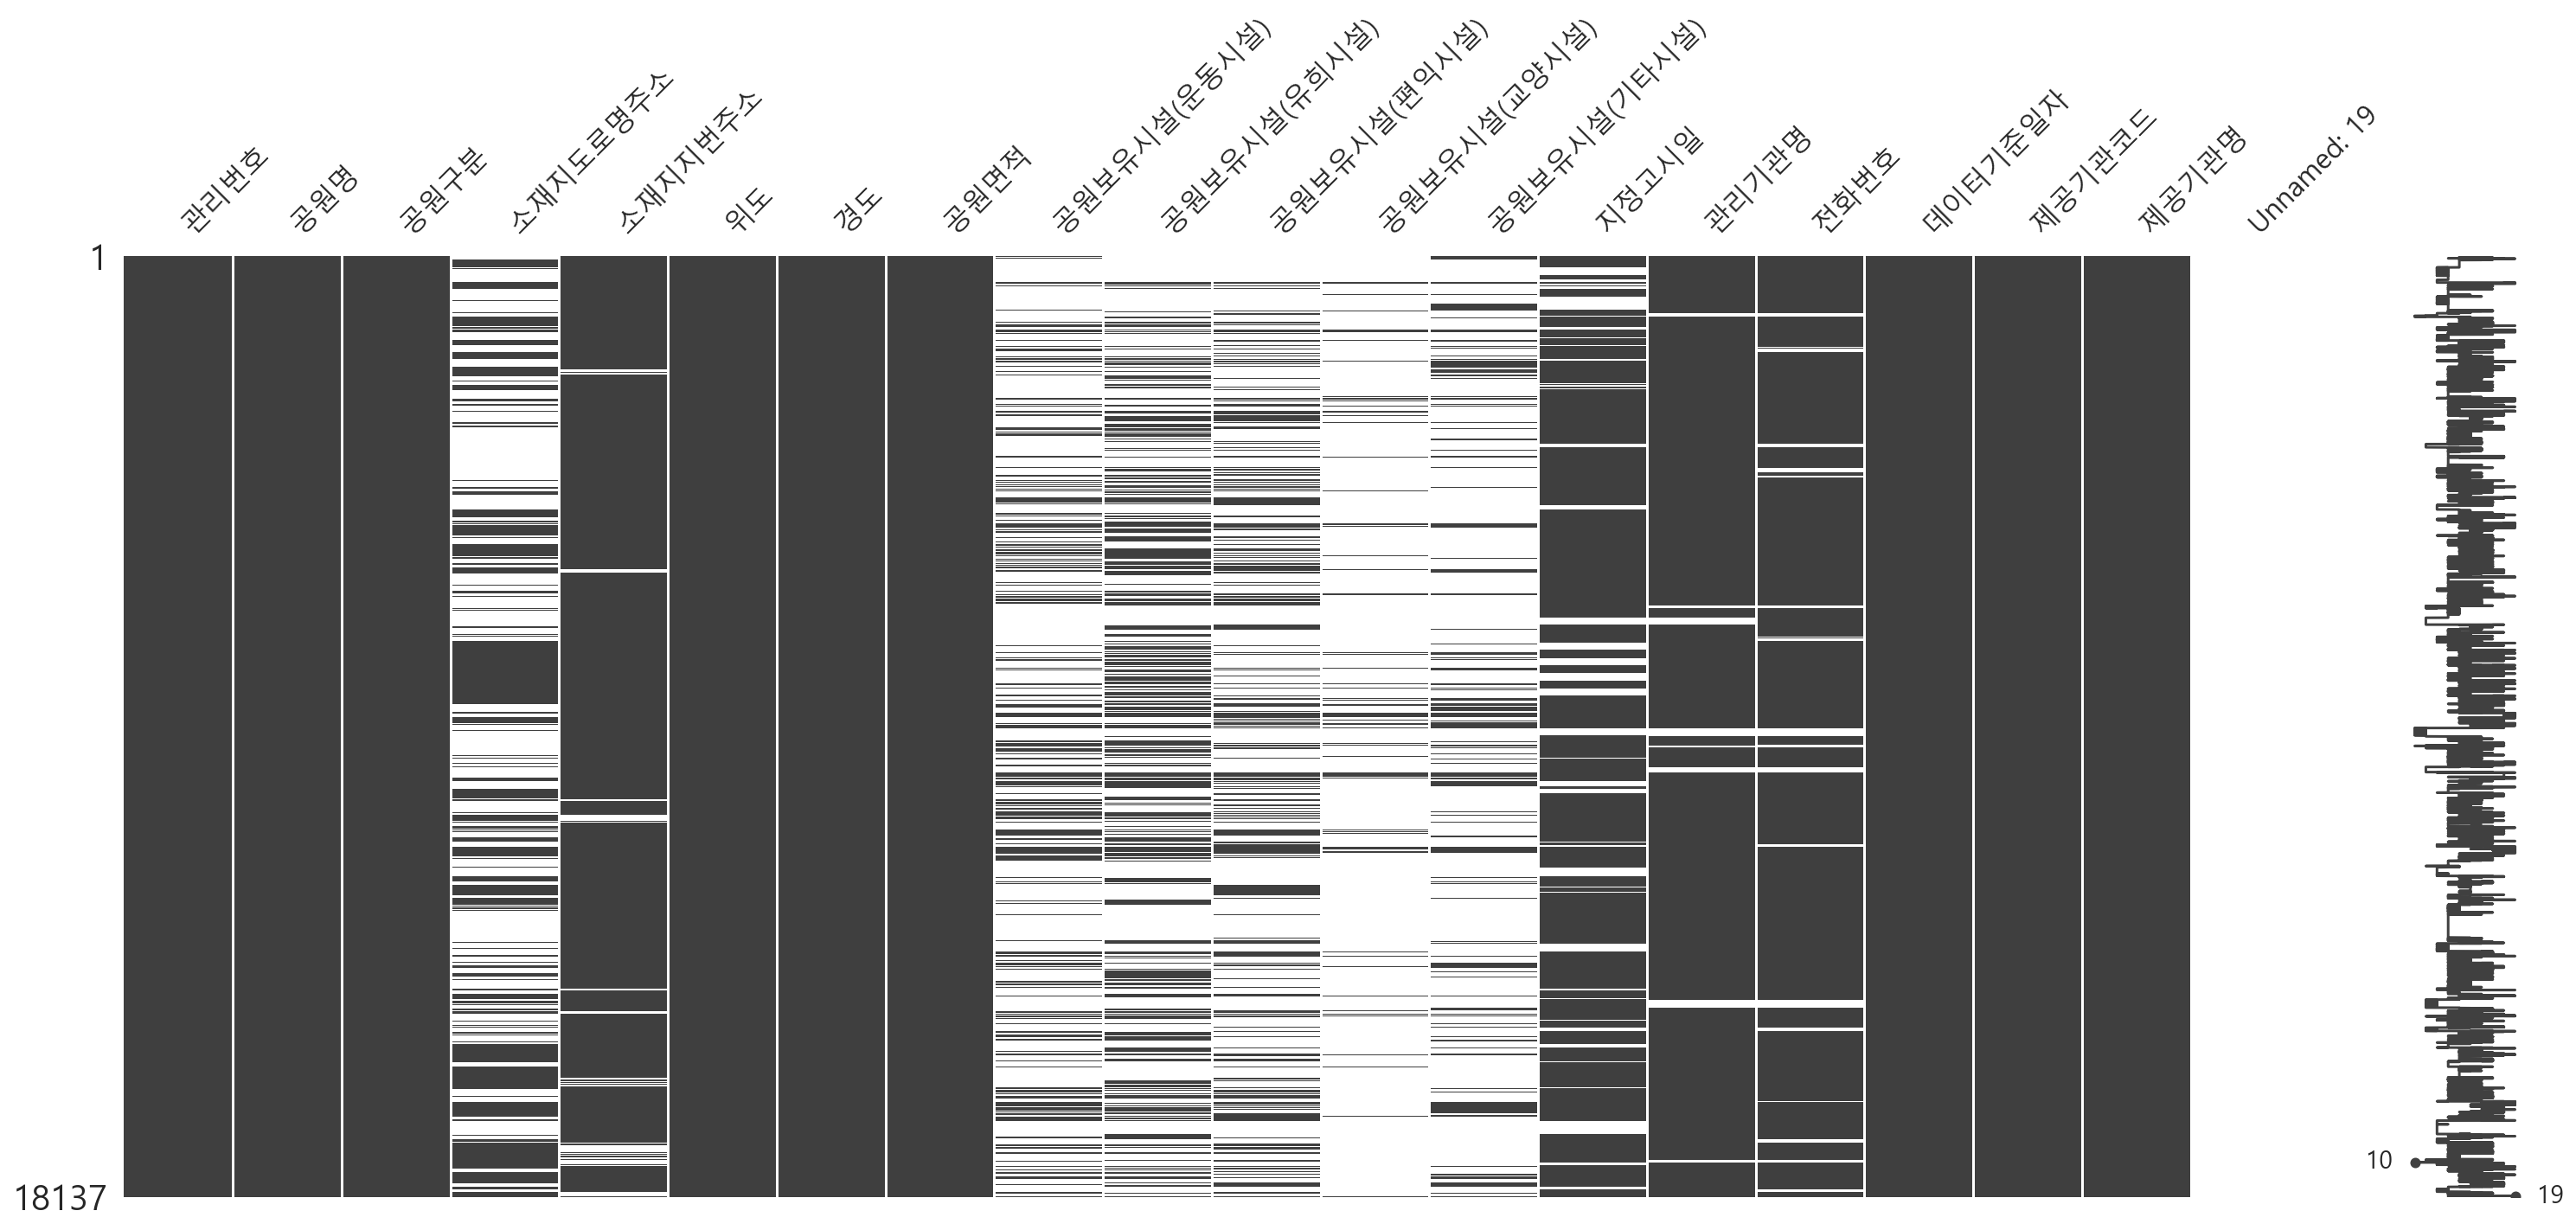

In [8]:
# 이전 챕터에서 설치하지 않았다면 아나콘다에 missingno를 설치합니다. 
# !conda install -c conda-forge missingno
# 라이브러리를 로드합니다.

import missingno
missingno.matrix(df)

* 그래프의 색상 선택 : [Choosing Colormaps in Matplotlib — Matplotlib 3.1.0 documentation](https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html)

<AxesSubplot:>

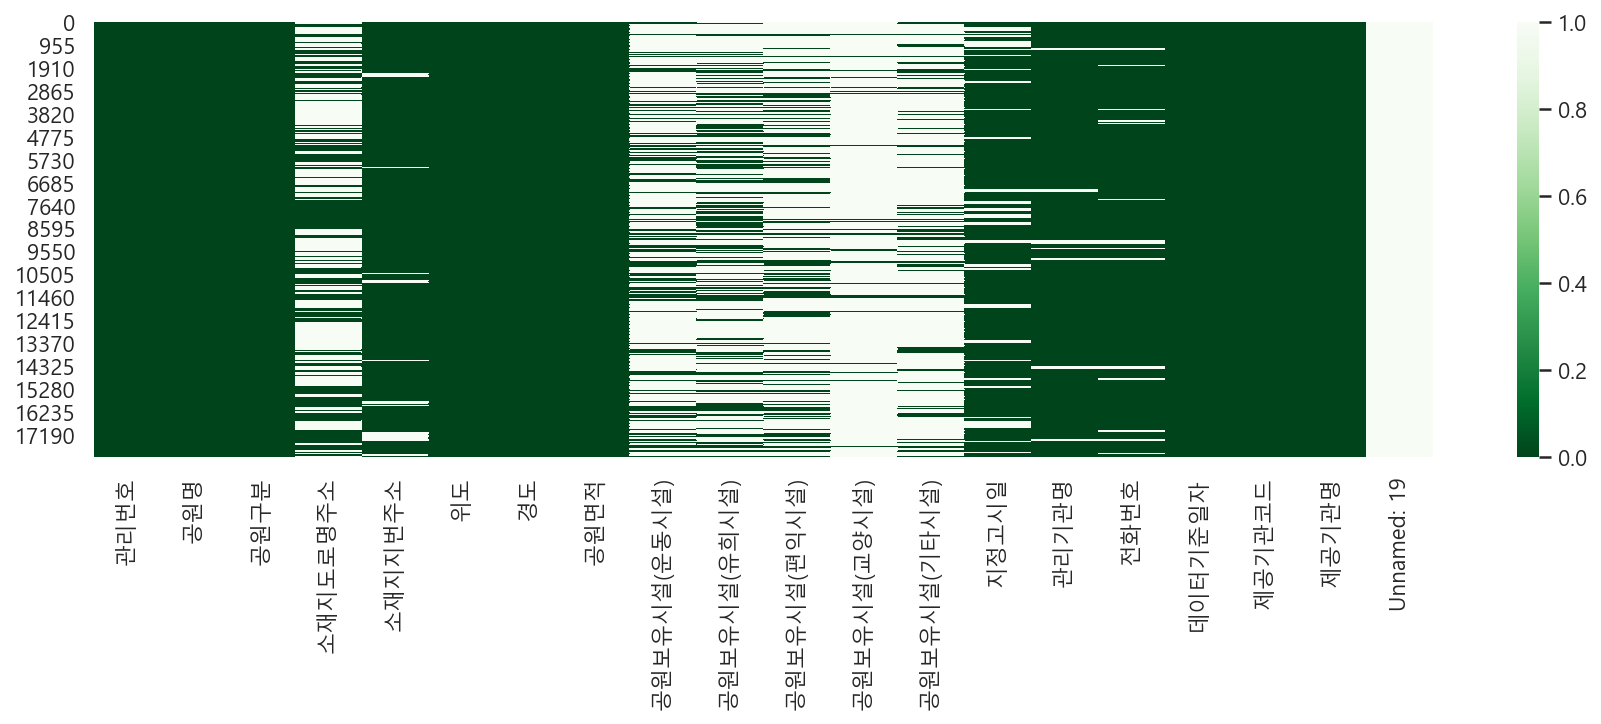

In [9]:
# seaborn을 통해 위와 같은 결측치 그래프를 그려봅니다.
null = df.isnull()
null.head()

plt.figure(figsize = (15, 4))
sns.heatmap(data = null, cmap = "Greens_r")#뒤에 _r을 안붙이면 결측치가 있을 경우 초록색으로 표시됨, _r을 붙이면 반대로 결측치는 흰색으로

# 데이터 전처리
* 불필요한 컬럼 제거
* 시도 결측치 처리
    * 다른 데이터로 대체
    * 도로명 혹은 지번 둘 중 하나만 있다면 있는 데이터로 대체
* 아웃라이어 데이터 제거 혹은 대체
    * 위경도가 국내 범위를 벗어나는 데이터의 경우 제외하고 그리도록 처리

## 불필요한 컬럼 제거하기

In [7]:
# 전체 컬럼명을 출력해 봅니다.
df.columns

Index(['관리번호', '공원명', '공원구분', '소재지도로명주소', '소재지지번주소', '위도', '경도', '공원면적',
       '공원보유시설(운동시설)', '공원보유시설(유희시설)', '공원보유시설(편익시설)', '공원보유시설(교양시설)',
       '공원보유시설(기타시설)', '지정고시일', '관리기관명', '전화번호', '데이터기준일자', '제공기관코드', '제공기관명',
       'Unnamed: 19'],
      dtype='object')

In [8]:
# drop 으로 'Unnamed: 19' 를 제거하기
print(df.shape)
df = df.drop('Unnamed: 19', axis = 1).copy()
print(df.shape)

(18137, 20)
(18137, 19)


## 결측치 대체
### 도로명 주소와 지번 주소 
* 둘 중 하나만 있을 때 나머지 데이터로 결측치 대체하기

In [9]:
# 도로명 주소의 널값 수
df['소재지도로명주소'].isna().sum()

10098

In [10]:
# 지번 주소의 널값 수
df['소재지지번주소'].isna().sum()

979

In [11]:
# "소재지도로명주소"와 "소재지지번주소"가 모두 결측치가 아닌 데이터를 찾습니다.
df[df['소재지도로명주소'].notna() & df['소재지지번주소'].notna()].shape

(7060, 19)

In [12]:
# "소재지도로명주소"의 결측치를 fillna 를 통해 "소재지지번주소"로 채웁니다.
df['소재지도로명주소'] = df['소재지도로명주소'].fillna(df["소재지지번주소"])

In [13]:
# "소재지도로명주소"의 결측치수를 세어봅니다.
df['소재지도로명주소'].isna().sum()

0

In [14]:
# "소재지도로명주소"와 "소재지지번주소"가 모두 결측치인 데이터를 찾습니다.
df[df['소재지도로명주소'].isnull() & df['소재지지번주소'].isnull()].shape # 0행이므로 둘다 결측치인 데이터는 없다.

(0, 19)


## 파생변수 만들기
### 주소를 통한 시도, 구군 변수 생성하기

In [15]:
# 소재지도로명주소로 시도, 구군 변수 생성하기
# .str.split(' ', expand=True)[0] 을 통해 공백문자로 분리하고 리스트의 첫번째 값을 가져오도록 하기

df["시도"] = df['소재지도로명주소'].str.split(expand = True)[0]

In [16]:
# 구군 가져오기
df["구군"] = df['소재지도로명주소'].str.split(expand = True)[1]
df[['시도', '구군']].sample(3)

시도   구군
12877   충청북도  청주시
10811  인천광역시   서구
11133  대전광역시   동구

In [17]:
# 시도 데이터의 빈도수 세어보기
df["시도"].value_counts()

경기도        3318
전라남도       1882
경상남도       1825
서울특별시      1745
충청남도       1723
전라북도       1137
경상북도        917
충청북도        899
울산광역시       887
인천광역시       675
부산광역시       653
강원도         647
대구광역시       586
대전광역시       497
광주광역시       429
제주특별자치도     246
세종특별자치시      70
강원            1
Name: 시도, dtype: int64

In [18]:
# 강원은 "강원도"로 변경해줄 필요가 보입니다.
df['시도'] = df["시도"].replace("강원", "강원도")
df['시도'].value_counts()

경기도        3318
전라남도       1882
경상남도       1825
서울특별시      1745
충청남도       1723
전라북도       1137
경상북도        917
충청북도        899
울산광역시       887
인천광역시       675
부산광역시       653
강원도         648
대구광역시       586
대전광역시       497
광주광역시       429
제주특별자치도     246
세종특별자치시      70
Name: 시도, dtype: int64

## 이상치 제거
* 경도, 위도의 이상치 처리하기

<AxesSubplot:xlabel='경도', ylabel='위도'>

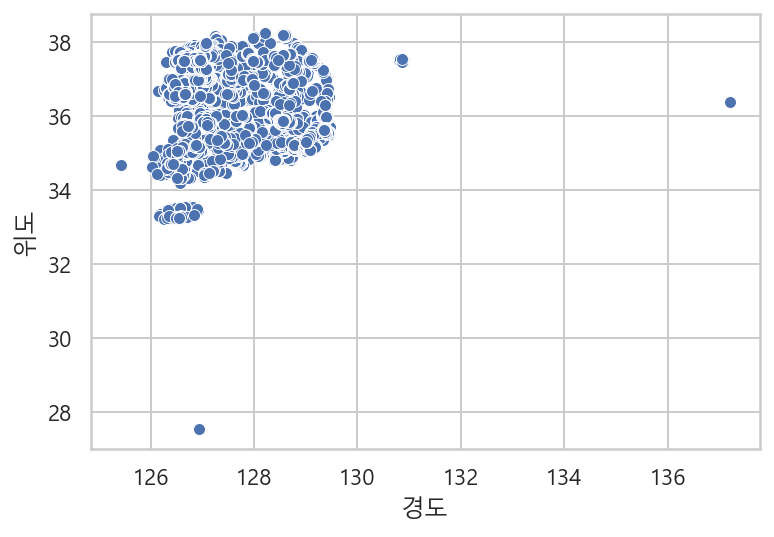

In [19]:
# 위경도 시각화
sns.scatterplot(data = df, x = "경도", y = "위도")

<AxesSubplot:xlabel='경도', ylabel='위도'>

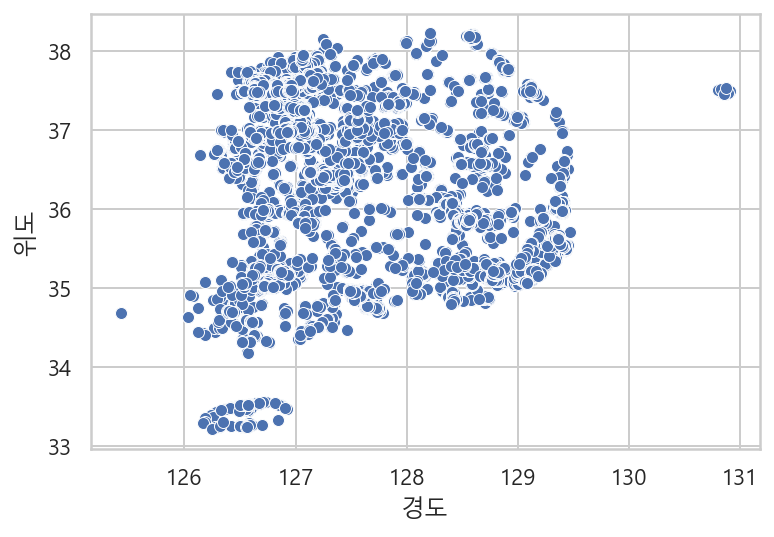

In [20]:
# 위 지도로 위도와 경도의 아웃라이어 데이터를 제외하고 출력해 봅니다.
# 좀 더 정확하게 출력하려면 대한민국 위경도 데이터 범위를 다시 넣어줍니다. 
# 이상치를 제거한 데이터를 df_park 라는 새로운 변수에 담습니다.

df_park = df[(df["경도"] < 132) & (df["위도"] > 32)].copy()
sns.scatterplot(data = df_park, x = "경도", y = "위도")

In [21]:
# 위도 경도의 아웃라이어 데이터가 제거되었는지 확인함



In [22]:
# scatterplot말고 describe으로도 위도와 경도의 이상치 여부를 확인 가능함.

df[["경도", "위도"]].describe() # 경도의 최댓값은 3사분위수 보다 훨씬 크고, 위도의 최솟값은 1사분위수보다 훨씬 작다.

경도            위도
count  18137.000000  18137.000000
mean     127.543937     36.335922
std        0.892670      1.051835
min      125.430955     27.551606
25%      126.872301     35.275430
50%      127.130926     36.364729
75%      128.466193     37.404278
max      137.202661     38.224926

In [23]:
# 위경도가 잘못입력된 데이터를 봅니다.
# 주소가 잘못되지는 않았습니다.
# 주소를 통해 위경도를 다시 받아올 필요가 있습니다. 

df[~((df["경도"] < 132) & (df["위도"] > 32))]

관리번호          공원명  공원구분                   소재지도로명주소  \
374    11440-00004         와우공원  근린공원  서울특별시 마포구 창전동3-231 등 59필지   
12926  43113-00080  근린공원5(만수공원)  근린공원   충청북도 청주시 흥덕구 오송읍 만수리 512   

                         소재지지번주소         위도          경도     공원면적 공원보유시설(운동시설)  \
374    서울특별시 마포구 창전동3-231 등 59필지  27.551606  126.929047  73590.0          NaN   
12926   충청북도 청주시 흥덕구 오송읍 만수리 512  36.374204  137.202661  33258.0          NaN   

      공원보유시설(유희시설)  ... 공원보유시설(교양시설) 공원보유시설(기타시설)       지정고시일  \
374            NaN  ...          NaN          NaN  1940-03-12   
12926          NaN  ...          NaN          NaN  2003-04-18   

                         관리기관명          전화번호     데이터기준일자   제공기관코드      제공기관명  \
374                  서울특별시 마포구  02-3153-9553  2019-07-22  3130000  서울특별시 마포구   
12926  충청북도 청주시 푸른도시사업본부 공원관리과  043-201-4433  2019-06-21  5710000   충청북도 청주시   

          시도   구군  
374    서울특별시  마포구  
12926   충청북도  청주시  

[2 rows x 21 columns]

## 날짜 데이터 다루기

In [24]:
# 지정고시일의 데이터 타입을 봅니다.
df["지정고시일"].head() # object파일로 되어있다.

0    2011-09-02
1    2008-02-28
2    2013-01-23
3    1998-07-25
4    1995-04-07
Name: 지정고시일, dtype: object

In [25]:
# 지정고시일의 데이터 타입을 datetime 형태로 변경합니다.

df["지정고시일"] = pd.to_datetime(df["지정고시일"])

In [26]:
# 고시연도와 고시월을 지정고시일에서 추출해서 파생변수를 만듭니다.

df["고시연도"] = df['지정고시일'].dt.year
df['고시월'] = df["지정고시일"].dt.month
df[["지정고시일", '고시연도', '고시월']]

지정고시일    고시연도   고시월
0     2011-09-02  2011.0   9.0
1     2008-02-28  2008.0   2.0
2     2013-01-23  2013.0   1.0
3     1998-07-25  1998.0   7.0
4     1995-04-07  1995.0   4.0
...          ...     ...   ...
18132 1998-07-20  1998.0   7.0
18133 1973-03-02  1973.0   3.0
18134 1977-06-29  1977.0   6.0
18135 1978-02-14  1978.0   2.0
18136 2009-11-19  2009.0  11.0

[18137 rows x 3 columns]

In [27]:
# 화랑공원의 고시연도를 찾아봅니다. 데이터 전처리가 맞게 되었는지 확인해 봅니다.
df.loc[df["공원명"].str.contains("화랑"), ['지정고시일', '고시연도', '고시월']]

지정고시일    고시연도   고시월
3077  2004-12-30  2004.0  12.0
4310  2010-12-30  2010.0  12.0
7316  1972-05-01  1972.0   5.0
10490 2004-11-17  2004.0  11.0
10763 1980-03-27  1980.0   3.0
15066 1991-01-01  1991.0   1.0

2912


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='고시연도', ylabel='Density'>

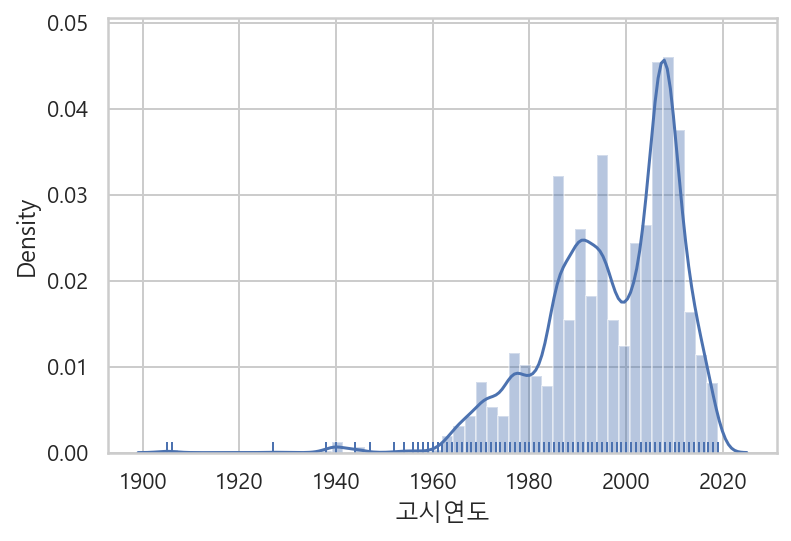

In [28]:
# 고시연도의 분포를 distplot 으로 그립니다.
# 이 때, 결측치가 있으면 오류가 나기 때문에 결측치가 없는 데이터만 따로 모아 그립니다.
print(df["고시연도"].isna().sum())
sns.distplot(df.loc[df["고시연도"].notnull(), "고시연도"], rug = True) # rug : 밑에 울타리 같이 선 그어있는거

* 판다스 스타일링 : [Styling — pandas documentation](https://pandas.pydata.org/pandas-docs/stable/user_guide/style.html)
* 숫자의 많고 적음에 따라 heatmap 처럼 스타일을 표현 가능 합니다.

In [29]:
# 연도와 월별 고시 현황을 pivot_table로 그려봅니다.
# year_month 라는 변수에 담아 재사용 합니다.
# 데이터가 많기 때문에 2000년보다 크고 2019년보다 작은 연도의 데이터만 봅니다.
year_month = pd.pivot_table(df, index="고시연도", columns="고시월", 
               values="공원명", aggfunc="count")
year_month = year_month[(year_month.index > 2000) & 
                        (year_month.index < 2019)]

<AxesSubplot:xlabel='고시월', ylabel='고시연도'>

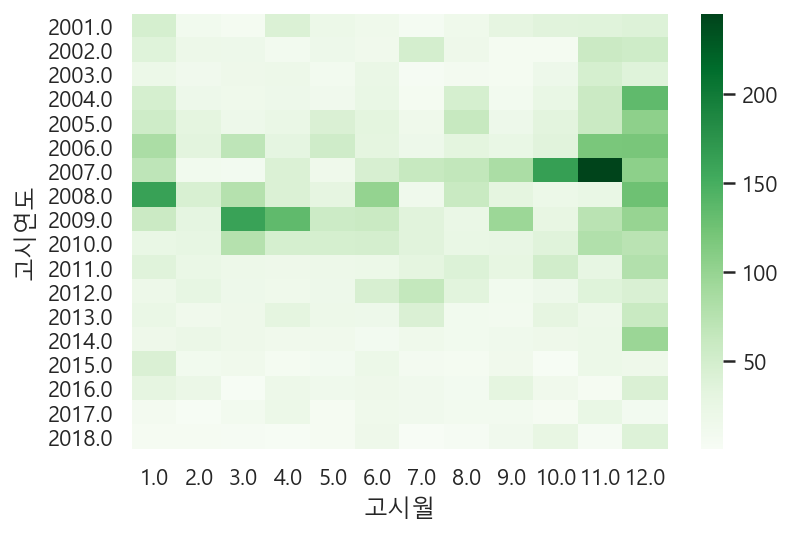

In [30]:
# 히트맵으로 고시 연도, 월의 분포를 확인
sns.heatmap(year_month, cmap = "Greens") # 2007년도 11월에 고시를 많이했다, 12월이 특히 많이 고시된다.

In [31]:
# style.backround_gradient로 시각화하기
year_month.astype(int).style.background_gradient(cmap = "Greens") # 히트맵과 유사한데 더 보기 쉽넹

## 텍스트 데이터 다루기
### 정규표현식 

* [정규 표현식 - 위키백과, 우리 모두의 백과사전](https://ko.wikipedia.org/wiki/%EC%A0%95%EA%B7%9C_%ED%91%9C%ED%98%84%EC%8B%9D)


* 파이썬 공식문서 정규표현식 참고하기 : 
    * https://docs.python.org/3.8/library/re.html#re.sub
    
    
* 문자열 바꾸기 : re.sub("규칙", "패턴", "데이터")
    * https://docs.python.org/3.8/library/re.html#text-munging


* 정규표현식 문자열 패턴
    * https://docs.python.org/3.8/howto/regex.html#matching-characters

    
    
* [    ] : 일치시킬 문자 세트의 패턴
* [가나다] : 가 or 나 or 다 중에 하나를 포함하고 있는지
* [가-힣] : 한글 가부터 힣까의 문자 중 하나를 포함하고 있는지
* [0-9] : 0~9까지의 숫자 중 하나를 포함하고 있는지
* [^0-9] : 숫자를 포함하고 있지 않음
* [^가-힣] : 한글이 포함되어 있지 않음
* [가-힣+] : 한글이 하나 이상 포함되는지


| 클래스 | 표현식 | 설명 |
|----|-----|----|
|\d | [0-9]|십진수와 일치|
|\D| [^0-9] | 숫자가 아닌 문자와 일치|
|\s |[\t\n\r\f\v] | 공백 문자와 일치 |
|\S |[^\t\n\r\f\v]| 공백이 아닌 문자와 일치|
| \w| [a-zA-Z0-9_] | 모든 숫자 영문자와 일치|
| \W| [^a-zA-Z0-9_]| 영문자, 숫자가 아닌 것과 일치|


표현식	설명

|표현식 | 설명 |	
|----|-----|
|^x	| 문자열의 시작을 표현하며 x 문자로 시작|
|x$	| 문자열의 종료를 표현하며 x 문자로 종료|
|.x	| 임의의 한 문자의 자리수를 표현하며 문자열이 x 로 끝남|
|x+	| 반복을 표현하며 x 문자가 한번 이상 반복됨|
|x*	| 반복여부를 표현하며 x 문자가 0번 또는 그 이상 반복됨|
|x?	| 존재여부를 표현하며 x 문자가 존재할 수도, 존재하지 않을 수도 있음|
|x\|y	| or 를 표현하며 x 또는 y 문자가 존재함|
|(x)	| 그룹을 표현하며 x 를 그룹으로 처리함|
|(x)(y)	| 그룹들의 집합을 표현하며 순서대로 번호를 부여하여 x, y 는 각 그룹의 데이터로 관리|
|(x)(?:y)	| 그룹들의 집합에 대한 예외를 표현하며 그룹 집합으로 관리되지 않음|
|x{n}	| 반복을 표현하며 x 문자가 n번 반복됨|
|x{n,}	| 반복을 표현하며 x 문자가 n번 이상 반복됨
|x{n,m}	| 반복을 표현하며 x 문자가 최소 n번 이상 최대 m 번 이하로 반복됨|


In [31]:
# 정규표현식 라이브러리를 로드합니다.
# 설치가 필요 없이 파이썬에 내장되어 있는 라이브러리 입니다.
# 파이썬에 배터리 포함됨 이라는 특징이 있는데 이런 여러 표준 라이브러리가 잘 갖춰져 있습니다.
import re

### 공원 보유시설

In [41]:
# 컬럼이 너무 많으면 끝까지 보이지 않습니다. 
# options.display 를 사용해 max_columns 값을 채워줍니다.
print(df.shape)
pd.options.display.max_columns = 100

(18137, 23)


In [33]:
# 데이터를 미리보기 합니다.
df[df['공원보유시설(운동시설)'].notnull()].sample(10)
df.head(1)

관리번호   공원명  공원구분              소재지도로명주소               소재지지번주소  \
0  26440-00001  구랑공원  문화공원  부산광역시 강서구 구랑동 1199-7  부산광역시 강서구 구랑동 1199-7   

          위도          경도    공원면적 공원보유시설(운동시설) 공원보유시설(유희시설) 공원보유시설(편익시설)  \
0  35.157215  128.854935  9137.0            4          NaN          화장실   

  공원보유시설(교양시설)                                       공원보유시설(기타시설)      지정고시일  \
0          NaN  팔각정자, 파고라2, 평의자6, 앉음벽14.38m, 축구장(골대2), 컨테이너, 안... 2011-09-02   

              관리기관명          전화번호     데이터기준일자   제공기관코드      제공기관명     시도   구군  \
0  부산광역시 강서구청 녹지공원과  051-970-4536  2019-05-02  3360000  부산광역시 강서구  부산광역시  강서구   

     고시연도  고시월  
0  2011.0  9.0

### 운동시설
* 텍스트 데이터의 빈도수를 구합니다.
* 한 컬럼에 여러 텍스트가 , 혹은 - 등의 특수문자로 구분되어 있습니다.
* 데이터 전처리를 통해 텍스트의 빈도수를 구합니다.

In [34]:
# "공원보유시설(운동시설)" 의 빈도수를 세어 아래에서 5개만 봅니다.
df['공원보유시설(운동시설)'].value_counts(sort=False).head(5)

족구장 1면, 배더민턴장 2면           8
노르딕머신외 3종                  1
배드민턴장1, 게이트볼장1, 기타2        1
체력단련시설 1개소 5개              4
허리돌리기 1, 공중걷기 1, 파도타기 1    1
Name: 공원보유시설(운동시설), dtype: int64

In [35]:
# "공원보유시설(운동시설)"의 unique 값을 구하고 리스트 형태로 만듭니다.
# 그리고 다시 str 형태로 변경하고 gym 이라는 변수에 담습니다.

gym = str(df["공원보유시설(운동시설)"].unique().tolist())
gym

"['4', '7', nan, '8', '5', '6', '3', '10', '14', '9', '30', '2', '13', '12', '40', '17', '-', '농구장', '궁도장', '풋살구장', '풋살구장, 농구장, 인라인스케이트장', '축구장', '족구장', '게이트볼장', '운동기구14개, 농구장2개소, 족구장1개소', '운동기구6개, 족구장1개소', '운동기구10개', '운동기구4개', '운동기구7개', '에어로빅장, 농구장', '테니스장, 씨름장, 농구장', '바디싣업1,스트레칭롤러1,전신돌리기1,허리안마기1,허리비틀기1', 'TM스탭사이클1,TM체어웨이트1,TM트윈바디싣업1,TM트윈트위스트1,TM크로스컨트리1,TM풀웨이트1', '철봉1', '하늘걷기1,마라톤운동1,허리돌리기1,3단철봉,윗몸일으키기1', '철봉1,팔굽혀펴기1,몸통돌리기1,허리좌우로흔들기1', '스트레칭롤러1,풀웨이트1,바웨이트1', '하늘걷기1,온몸허리돌리기1,스트레칭기1,거꾸로매달리기1', '하늘걷기1,온몸허리돌리기1,등허리지압기1,철봉3', '스탭싸이클1,풀웨이트1,트리플트위스트2,트윈바디싣업1,크로스컨트리1,스트레칭롤러1,트윈워밍암1', '하늘걷기2,스탭싸이클1,체어폴1,철봉1,트리플트위스트2,트윈바디싣업1', '윗몸일으키기1,온몸허리돌리기1,팔굽혀펴기1,다리뻗치기1,온몸허리돌리기1,거꾸로매달리기1', '하늘걷기1,온몸허리돌리기1,옆파도타기1', '크로스워킹+스카이워킹1,파워프레스+풀웨이트1,싸이클론+트위스트1,스탠드업+마사지롤1,사이드스윙+터닝암1,푸시웨이트+레그프레스1', '평행봉1', '트윈바디싣업1,트윈트위스트1,스탭싸이클1,크로스컨트리1,체어풀1', '크로스컨트리1,자전거팔뻗기2,등안마기1,트윈워밍암1,체어웨이트1,오버턴스트레칭1', '크로스컨트리1,롤링웨이스트1,레그프레스1,트윈트위스트1,체어웨이트1', '족구장1,역기1', '등지압기1,마라톤운동+공중걷기운동1,허리돌리기+온몸돌리기1, 온몸역기올리기+온몸근육풀기1', '트리플트위스트1,트윈바디싣업1,크로스컨

### !!!!!!!!!!!!!!!!!의문!!!!!!!!!!!!!!!!
```여기서 unique값으로 하면 전체 빈도수를 구하는게 아니라 중복된 값을 제거하고 빈도수 구하는 거 아닌가..?
결국 unique를 빼야 되지 않나..?```

In [36]:
gym = gym.replace("'", "").replace("+", ",").replace("/", ",").replace(" ", ",")
gym

'[4,,7,,nan,,8,,5,,6,,3,,10,,14,,9,,30,,2,,13,,12,,40,,17,,-,,농구장,,궁도장,,풋살구장,,풋살구장,,농구장,,인라인스케이트장,,축구장,,족구장,,게이트볼장,,운동기구14개,,농구장2개소,,족구장1개소,,운동기구6개,,족구장1개소,,운동기구10개,,운동기구4개,,운동기구7개,,에어로빅장,,농구장,,테니스장,,씨름장,,농구장,,바디싣업1,스트레칭롤러1,전신돌리기1,허리안마기1,허리비틀기1,,TM스탭사이클1,TM체어웨이트1,TM트윈바디싣업1,TM트윈트위스트1,TM크로스컨트리1,TM풀웨이트1,,철봉1,,하늘걷기1,마라톤운동1,허리돌리기1,3단철봉,윗몸일으키기1,,철봉1,팔굽혀펴기1,몸통돌리기1,허리좌우로흔들기1,,스트레칭롤러1,풀웨이트1,바웨이트1,,하늘걷기1,온몸허리돌리기1,스트레칭기1,거꾸로매달리기1,,하늘걷기1,온몸허리돌리기1,등허리지압기1,철봉3,,스탭싸이클1,풀웨이트1,트리플트위스트2,트윈바디싣업1,크로스컨트리1,스트레칭롤러1,트윈워밍암1,,하늘걷기2,스탭싸이클1,체어폴1,철봉1,트리플트위스트2,트윈바디싣업1,,윗몸일으키기1,온몸허리돌리기1,팔굽혀펴기1,다리뻗치기1,온몸허리돌리기1,거꾸로매달리기1,,하늘걷기1,온몸허리돌리기1,옆파도타기1,,크로스워킹,스카이워킹1,파워프레스,풀웨이트1,싸이클론,트위스트1,스탠드업,마사지롤1,사이드스윙,터닝암1,푸시웨이트,레그프레스1,,평행봉1,,트윈바디싣업1,트윈트위스트1,스탭싸이클1,크로스컨트리1,체어풀1,,크로스컨트리1,자전거팔뻗기2,등안마기1,트윈워밍암1,체어웨이트1,오버턴스트레칭1,,크로스컨트리1,롤링웨이스트1,레그프레스1,트윈트위스트1,체어웨이트1,,족구장1,역기1,,등지압기1,마라톤운동,공중걷기운동1,허리돌리기,온몸돌리기1,,온몸역기올리기,온몸근육풀기1,,트리플트위스트1,트윈바디싣업1,크로스컨트리1,체어웨이트1,롤링웨이스트1,레그프레스1,오버턴스트레칭1,,윗몸일으키기2,트리플트위스트2,평행봉1,,크로스컨트리1,,레그프레스1,체어웨이트1,롤링웨이스트1,트윈바디싣업1,레

In [37]:
import re
gym = re.sub("[\nan\[\-\d\]]", "", gym)
gym = re.sub(",{2,}", ",", gym)
gym

',농구장,궁도장,풋살구장,풋살구장,농구장,인라인스케이트장,축구장,족구장,게이트볼장,운동기구개,농구장개소,족구장개소,운동기구개,족구장개소,운동기구개,운동기구개,운동기구개,에어로빅장,농구장,테니스장,씨름장,농구장,바디싣업,스트레칭롤러,전신돌리기,허리안마기,허리비틀기,TM스탭사이클,TM체어웨이트,TM트윈바디싣업,TM트윈트위스트,TM크로스컨트리,TM풀웨이트,철봉,하늘걷기,마라톤운동,허리돌리기,단철봉,윗몸일으키기,철봉,팔굽혀펴기,몸통돌리기,허리좌우로흔들기,스트레칭롤러,풀웨이트,바웨이트,하늘걷기,온몸허리돌리기,스트레칭기,거꾸로매달리기,하늘걷기,온몸허리돌리기,등허리지압기,철봉,스탭싸이클,풀웨이트,트리플트위스트,트윈바디싣업,크로스컨트리,스트레칭롤러,트윈워밍암,하늘걷기,스탭싸이클,체어폴,철봉,트리플트위스트,트윈바디싣업,윗몸일으키기,온몸허리돌리기,팔굽혀펴기,다리뻗치기,온몸허리돌리기,거꾸로매달리기,하늘걷기,온몸허리돌리기,옆파도타기,크로스워킹,스카이워킹,파워프레스,풀웨이트,싸이클론,트위스트,스탠드업,마사지롤,사이드스윙,터닝암,푸시웨이트,레그프레스,평행봉,트윈바디싣업,트윈트위스트,스탭싸이클,크로스컨트리,체어풀,크로스컨트리,자전거팔뻗기,등안마기,트윈워밍암,체어웨이트,오버턴스트레칭,크로스컨트리,롤링웨이스트,레그프레스,트윈트위스트,체어웨이트,족구장,역기,등지압기,마라톤운동,공중걷기운동,허리돌리기,온몸돌리기,온몸역기올리기,온몸근육풀기,트리플트위스트,트윈바디싣업,크로스컨트리,체어웨이트,롤링웨이스트,레그프레스,오버턴스트레칭,윗몸일으키기,트리플트위스트,평행봉,크로스컨트리,레그프레스,체어웨이트,롤링웨이스트,트윈바디싣업,레그스트레칭,크로스컨트리,어깨근육풀기,체어웨이트,트윈바디싣업(구형),트리플트위스트(구형),게이트볼장,운동시설,축구장,족구장,족구장,운동기구,운동기구,축구장,배드민턴장,농구장,배드민턴장,족구장,농구대,배드민턴장,배드민턴장,농구대,농구장,개소,배드민턴장,게이트볼장,개소.,체력단련시설,개소,기,등,배드민턴장,개소,체력단련시설,개소,개,배드민턴장,개소,농구장,개소,체력단련시설,개소,개,다

In [38]:
gym_count = pd.Series(gym.split(",")).value_counts()
gym_count[:20]

배드민턴장     221
농구장       216
운동기구      185
게이트볼장     156
체력단련시설    148
등         140
족구장       124
종         111
농구대       108
축구장        95
허리돌리기      87
테니스장       87
개소         80
외          60
다목적운동장     58
철봉         49
개          49
공중걷기       44
야외운동기구     43
외종         41
dtype: int64

<AxesSubplot:>

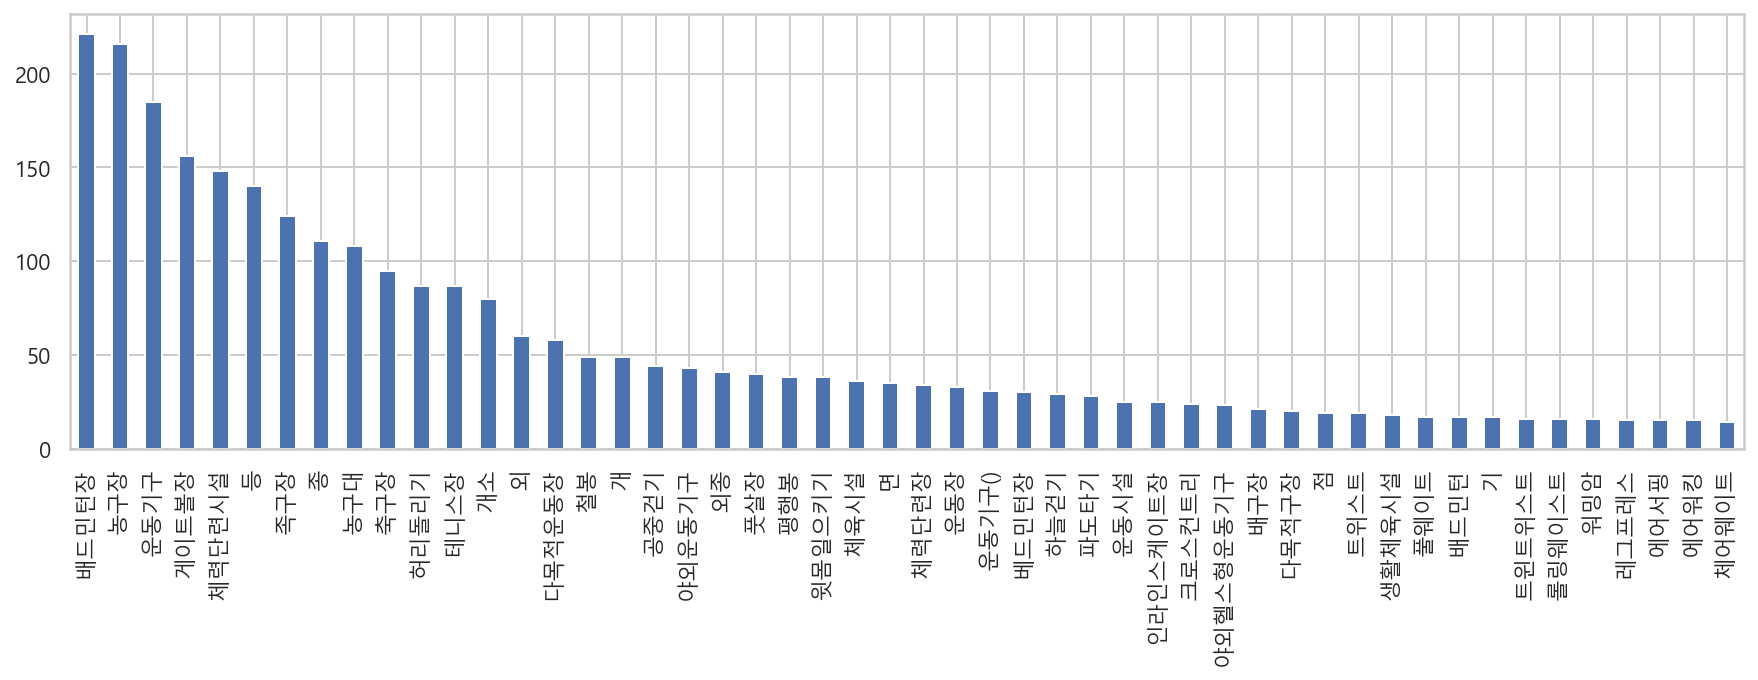

In [39]:
gym_count.head(50).plot.bar(figsize=(15, 4)) # 등, 종, 외, 개소, 개, 면, 점, 기  를 제거해준다.

<AxesSubplot:>

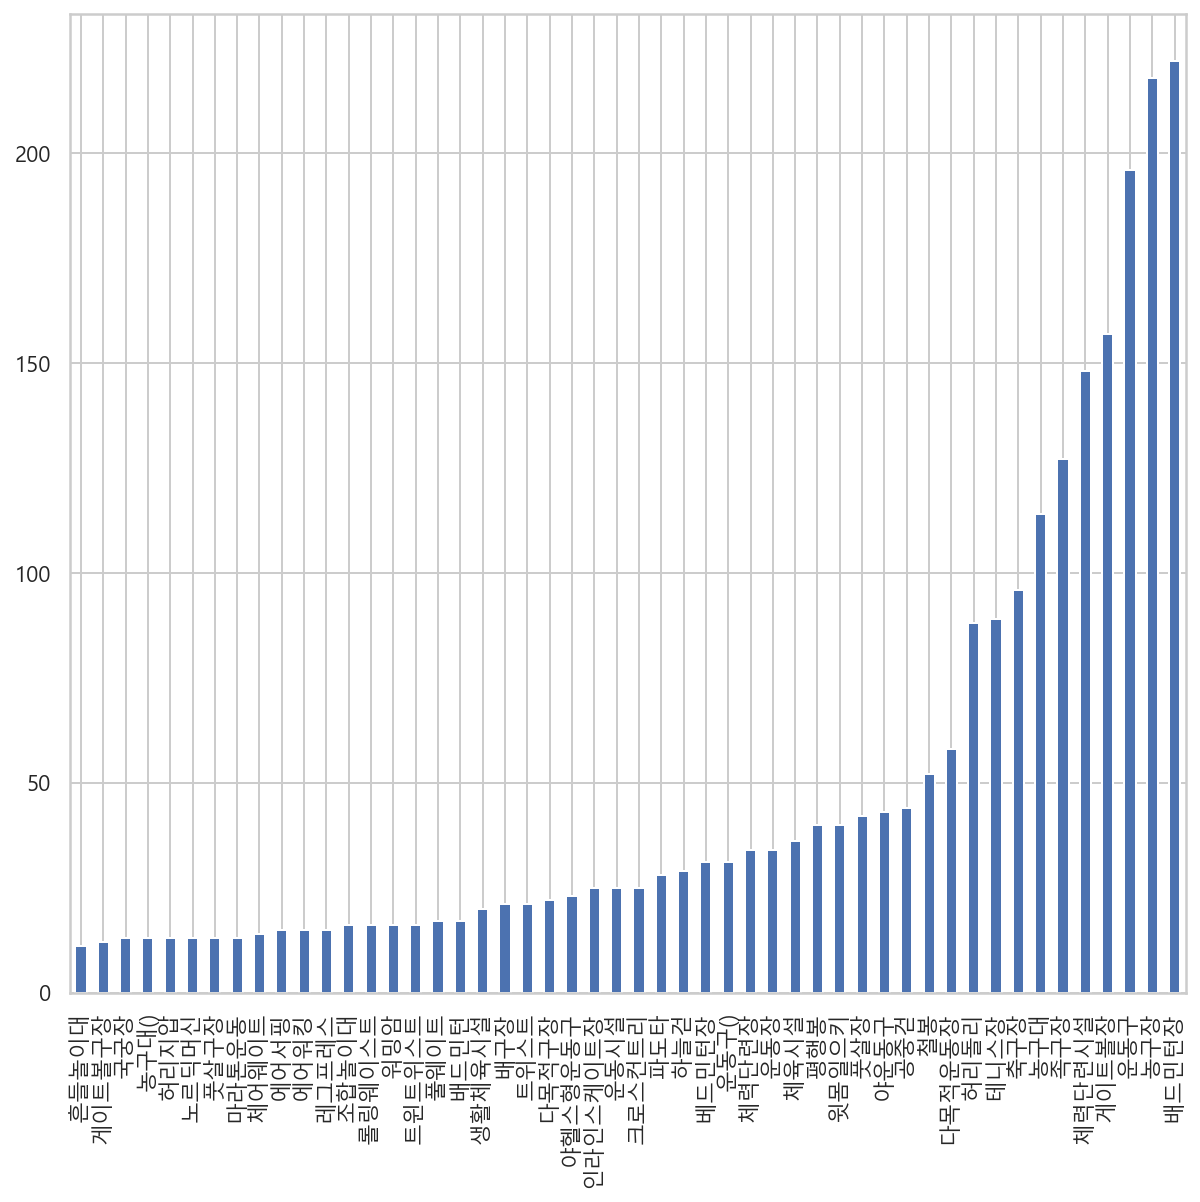

In [40]:
gym = gym.replace("개소", "").replace("등", "").replace("종", "").replace("개", "").replace("외", "").replace("면", "")\
.replace("기", "").replace("점", "")
gym = re.sub(",{2,}", ",", gym)
gym_count2 = pd.Series(gym.split(",")).value_counts()
gym_count2
gym_count2.sort_values().tail(50).plot.bar(figsize = (10, 9))

### 워드클라우드로 빈도수 표현하기
[amueller/word_cloud: A little word cloud generator in Python](https://github.com/amueller/word_cloud)

* 별도의 설치가 필요합니다. 
* 다음 명령어로 설치가 가능합니다. conda prompt 혹은 터미널을 열어 설치해 주세요.

* conda 사용시 : `conda install -c conda-forge wordcloud`
* pip 사용시 : `pip install wordcloud`

In [41]:
# 공식문서의 튜토리얼을 보고 wordcloud를 그리는 함수를 만들어 봅니다.
# 이때 폰트 설정시 폰트명이 아닌 폰트의 설치 경로를 입력해 주셔야 합니다.
# 윈도우 : r"C:\Windows\Fonts\malgun.ttf" 해당 경로에 폰트가 있는지 확인을 해주세요.
# 맥 : r"/Library/Fonts/AppleGothic.ttf"
# 나눔고딕 등의 폰트를 설치했다면 : '/Library/Fonts/NanumBarunGothic.ttf'

from wordcloud import WordCloud

def wordcloud(data, width, height):
    word_draw = WordCloud(
    font_path = r"C:\Windows\Fonts\malgun.ttf",
    width = width, height = height,
    background_color = "white",
    stopwords=["운동기구", "개소", "외종"], # 원치 않는 문자는 표시 안해준다.
    random_state =42)  # world cloud는 그릴때마다 바뀌는데 random_state를 지정하면 항상 같은 모습으로 그려주게 함.
    
    word_draw.generate(data)
    
    plt.figure(figsize = (15, 7)) # 워드 클라우드 그리기 전 사이즈를 지정해줘야한다. 
    plt.imshow(word_draw)
    plt.axis("off") # 축표시 X
    plt.show()
    


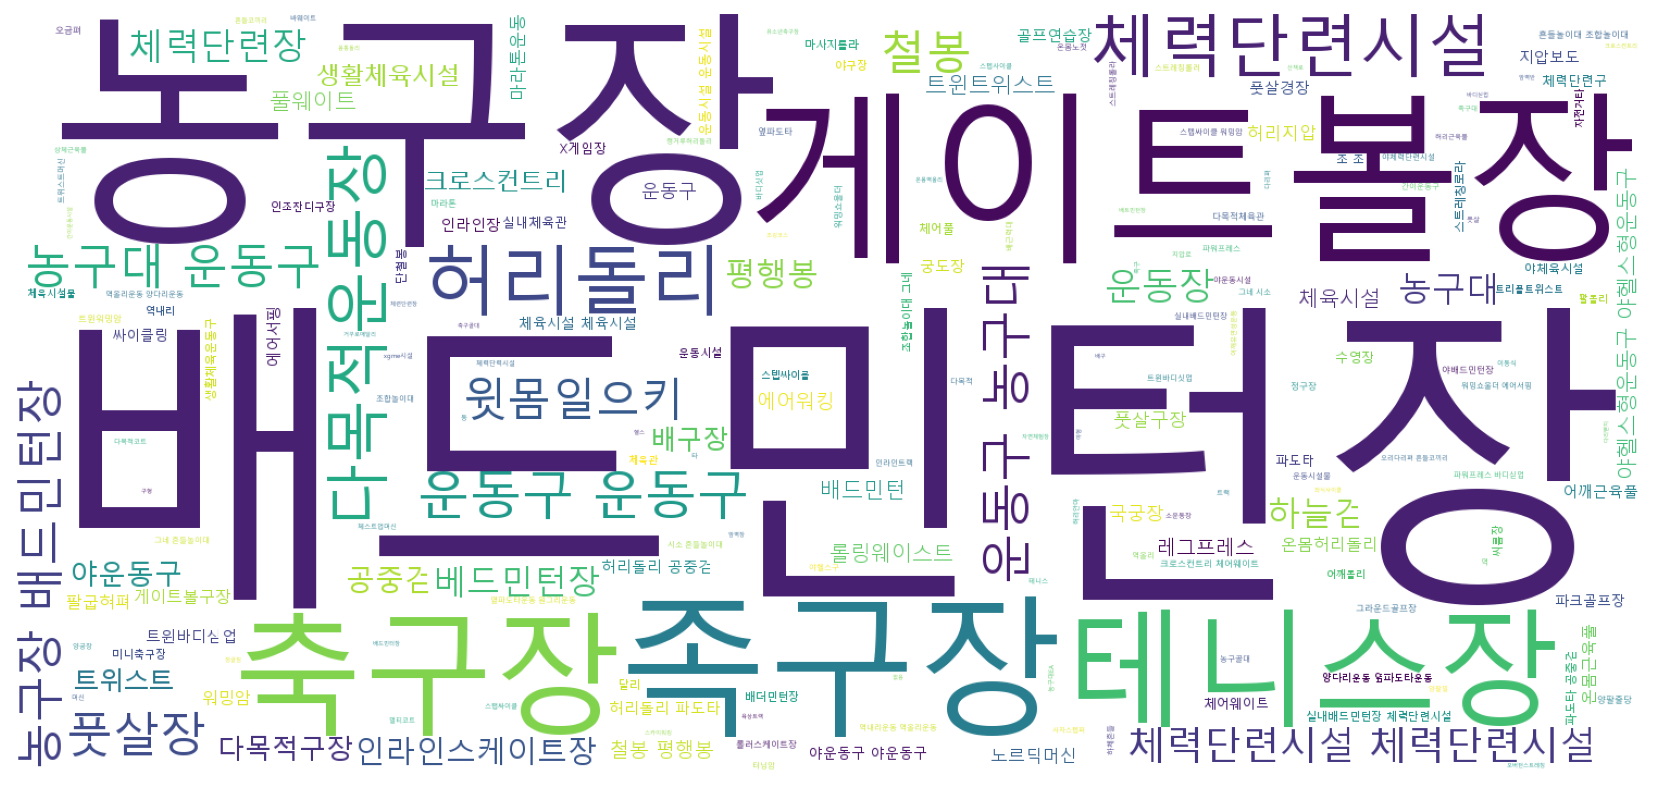

In [42]:
# 위에서 만든 함수에 전처리한 text인 gym을 넣어 그려봅니다.

wordcloud(gym, width = 1500, height = 700)


### 편익시설

In [43]:
df["공원보유시설(편익시설)"].value_counts()

화장실               1037
벤치                 193
정자,벤치              137
음수대                127
파고라                116
                  ... 
파고라1,의자12,화장실1       1
휴게쉼터, 의자,파고라         1
화장실, 평벤치, 파고라        1
박문객센터 1동             1
주차장 외2종              1
Name: 공원보유시설(편익시설), Length: 1102, dtype: int64

In [44]:
# 편익시설에서 필요 없는 문자를 제거하고
# 토큰화를 위해 각 시설을 "," 로 구분하도록 전처리를 하는 함수를 구현합니다. 
# 함수명은 get_string 으로 합니다.

def get_string(text):
    if pd.isna(text):
        return text
    
    text = re.sub("[\d\.'\-(nan)\[\]\/]", "", text)
    text = re.sub(" ", "", text)
    text = re.sub(",{2,}", ",", text)
    return text

In [45]:
# 함수가 잘 구현되었는지 확인해 봅니다.
# 다음의 문자를 전처리 했을 때  
# "[1. '화장실' 5, 2. 주차장, -, nan]" 전처리 후 '화장실,주차장,' 가 출력되는지 확인해 주세요.

get_string("[1. '화장실' 5, 2. 주차장, -, nan, /]")

'화장실,주차장,'

In [46]:
# 결측치를 넣어봅니다. 오류가 나지않는지 확인해 주세요.


get_string(np.nan)

nan

In [47]:
# map을 통해 위에서 구현한 함수를 적용해 줍니다.
# 원본과 비교해 보기 위해 "편익시설"이라는 새로운 컬럼을 만듭니다.
df["편익시설"] = df["공원보유시설(편익시설)"].map(get_string)
df["편익시설"].head()

0    화장실
1    NaN
2    NaN
3    NaN
4    NaN
Name: 편익시설, dtype: object

In [48]:
# 전처리 한 "편익시설"의 빈도수를 구하고 
# tail 로 끝부분에 있는 데이터를 미리보기 합니다.

df["편익시설"].tail(10)

18127            음수대
18128    주차장,화장실,음수대
18129            음수대
18130        화장실,음수대
18131            NaN
18132            NaN
18133            화장실
18134            NaN
18135            NaN
18136            화장실
Name: 편익시설, dtype: object

In [49]:
df.loc[df["편익시설"].notnull(), "편익시설"].head(50)

0                  화장실
10                 화장실
22       화장실,주차장,관리사무소
26                 화장실
30                 화장실
31             화장실,주차장
32             화장실,주차장
35             화장실,주차장
38                문화회관
44                 화장실
45                 화장실
47                 화장실
52                 음수전
64             음수전,주차장
65             주차장,화장실
506                   
507                   
508                   
509                화장실
510                   
511                   
512                   
513                   
514                   
515                   
516                   
517                   
518                   
519                   
520                   
521                   
522                   
523                   
524                   
525                   
526                   
527                   
528                   
529            주차장,화장실
544                화장실
546                화장실
547                화장실
562            주차장,화장실
569        

In [50]:
# 문자열을 연결해 주는 join 으로 편익시설을 연결해 주는 방법이 있습니다.
# 이 때, 결측치가 있으면 결측치는 숫자형태이기 때문에 문자와 연결되지 않아 오류가 납니다.
# 따라서 결측치를 제외한 값만 가져와서 연결합니다.

fac = ",".join(df.loc[df["편익시설"].notnull(), "편익시설"])
fac
fac = get_string(fac)
fac

'화장실,화장실,화장실,주차장,관리사무소,화장실,화장실,화장실,주차장,화장실,주차장,화장실,주차장,문화회관,화장실,화장실,화장실,음수전,음수전,주차장,주차장,화장실,화장실,주차장,화장실,화장실,화장실,화장실,주차장,화장실,화장실,주차장,화장실,축구장,화장실,주차장,화장실,주차장,화장실,주차장,화장실,주차장,야영장,운동장,화장실,주차장,화장실,주차장,주차장,화장실,화장실,주차장,화장실,화장실,주차장,무대,화장실,주차장,주차장,화장실,주차장,화장실,저수지,산책로,축구장,주차장,주차장,주차장,화장실,주차장,화장실,주차장,화장실개소,어린이놀이터개소,화장실개소,어린이놀이터개소,어린이놀이터개소,주차장,화장실,화장실,주차장,화장실,주차장,화장실,화장실,대피소,사무소,약수터,교량,통제소,화장실,파고라,탐방지원센터,정보문화센터,배드민턴장,인조잔디축구장,배구장,배드민턴장,테니스장,휴게광장,체력단련장,청소년문화회관,화장실,조합놀이대,배드민턴장,조합놀이대,의자등,조합놀이대,의자등,조합놀이대,의자,바닥분수등,조합놀이대,의자,바닥분수등,조합놀이대,의자등,조합놀이대,의자,바닥분수등,조합놀이대,의자,의자,운동기구등,조합놀이대,의자,바닥분수등,조합놀이대,의자,바닥분수등,조합놀이대,의자등,조합놀이대,의자,바닥분수등,조합놀이대,의자,바닥분수등,조합놀이대,의자,바닥분수등,조합놀이대,의자등,의자,운동기구등,조합놀이대,의자등,조합놀이대,의자,바닥분수등,조합놀이대,의자등,조합놀이대,의자등,조합놀이대,의자등,조합놀이대,의자,화장실등,모험놀이,의자등,모험놀이,의자등,조합놀이대,의자,화장실등,조합놀이대,의자등,조합놀이대,의자,화장실등,조합놀이대,의자등,조합놀이대,의자,화장실등,조합놀이대,그네,화장실등,조합놀이대,의자등,조합놀이대,의자등,조합놀이대,의자,바닥분수등,조합놀이대,의자등,조합놀이대,의자,벽천분수등,조합놀이대,의자등,조합놀이대,의자등,조합놀이대,의자등,조합놀이대,의자,바닥분수등,자판기,화장실,화장실,화장실,파고라,평의자,등의자,원형쉘터,평의자,오두막,평벤치,등벤치,정자,평벤치,파고라,등벤치,평벤치,

In [51]:
# 두번째방법
# 위에서 전처리한 "편익시설" 컬럼을 리스트 형태로 만들고 다시 str 으로 변환 합니다. 
# 위에서 만든 get_string 함수로 전처리를 합니다.

fac = str(df["편익시설"].tolist())
fac
fac = get_string(fac)
fac

'화장실,화장실,화장실,주차장,관리사무소,화장실,화장실,화장실,주차장,화장실,주차장,화장실,주차장,문화회관,화장실,화장실,화장실,음수전,음수전,주차장,주차장,화장실,화장실,주차장,화장실,화장실,화장실,화장실,주차장,화장실,화장실,주차장,화장실,축구장,화장실,주차장,화장실,주차장,화장실,주차장,화장실,주차장,야영장,운동장,화장실,주차장,화장실,주차장,주차장,화장실,화장실,주차장,화장실,화장실,주차장,무대,화장실,주차장,주차장,화장실,주차장,화장실,저수지,산책로,축구장,주차장,주차장,주차장,화장실,주차장,화장실,주차장,화장실개소,어린이놀이터개소,화장실개소,어린이놀이터개소,어린이놀이터개소,주차장,화장실,화장실,주차장,화장실,주차장,화장실,화장실,대피소,사무소,약수터,교량,통제소,화장실,파고라,탐방지원센터,정보문화센터,배드민턴장,인조잔디축구장,배구장,배드민턴장,테니스장,휴게광장,체력단련장,청소년문화회관,화장실,조합놀이대,배드민턴장,조합놀이대,의자등,조합놀이대,의자등,조합놀이대,의자,바닥분수등,조합놀이대,의자,바닥분수등,조합놀이대,의자등,조합놀이대,의자,바닥분수등,조합놀이대,의자,의자,운동기구등,조합놀이대,의자,바닥분수등,조합놀이대,의자,바닥분수등,조합놀이대,의자등,조합놀이대,의자,바닥분수등,조합놀이대,의자,바닥분수등,조합놀이대,의자,바닥분수등,조합놀이대,의자등,의자,운동기구등,조합놀이대,의자등,조합놀이대,의자,바닥분수등,조합놀이대,의자등,조합놀이대,의자등,조합놀이대,의자등,조합놀이대,의자,화장실등,모험놀이,의자등,모험놀이,의자등,조합놀이대,의자,화장실등,조합놀이대,의자등,조합놀이대,의자,화장실등,조합놀이대,의자등,조합놀이대,의자,화장실등,조합놀이대,그네,화장실등,조합놀이대,의자등,조합놀이대,의자등,조합놀이대,의자,바닥분수등,조합놀이대,의자등,조합놀이대,의자,벽천분수등,조합놀이대,의자등,조합놀이대,의자등,조합놀이대,의자등,조합놀이대,의자,바닥분수등,자판기,화장실,화장실,화장실,파고라,평의자,등의자,원형쉘터,평의자,오두막,평벤치,등벤치,정자,평벤치,파고라,등벤치,평벤치,

In [52]:
# 다시 ","로 텍스트를 분리하고 판다스의 Series 형태로 만들고 value_counts 로 빈도수를 계산합니다.
fac_count = pd.Series(fac.split(",")).value_counts()
fac_count.head()


화장실    1921
파고라     817
벤치      650
정자      535
주차장     502
dtype: int64

In [53]:
# 이건 진슬이 방법으로 전처리한 것(위에 운동시설에서 한 것과 비슷한 방법으로)
fac2 = str(df["공원보유시설(편익시설)"].tolist())
fac2 = fac2.replace("'", ",").replace("/", ",").replace("+", ",").replace(" ", "").replace(".", ",")
fac2 = re.sub("[\[\nan\-\d\]]", "", fac2)
fac2 = re.sub(",{2,}", ",", fac2)
pd.Series(fac2.split(",")).value_counts()

화장실        1953
파고라         842
벤치          661
주차장         551
정자          535
           ... 
LED바닥등B       1
아동복지관         1
도로            1
주차장외종         1
파고라PC덮개       1
Length: 437, dtype: int64

<AxesSubplot:>

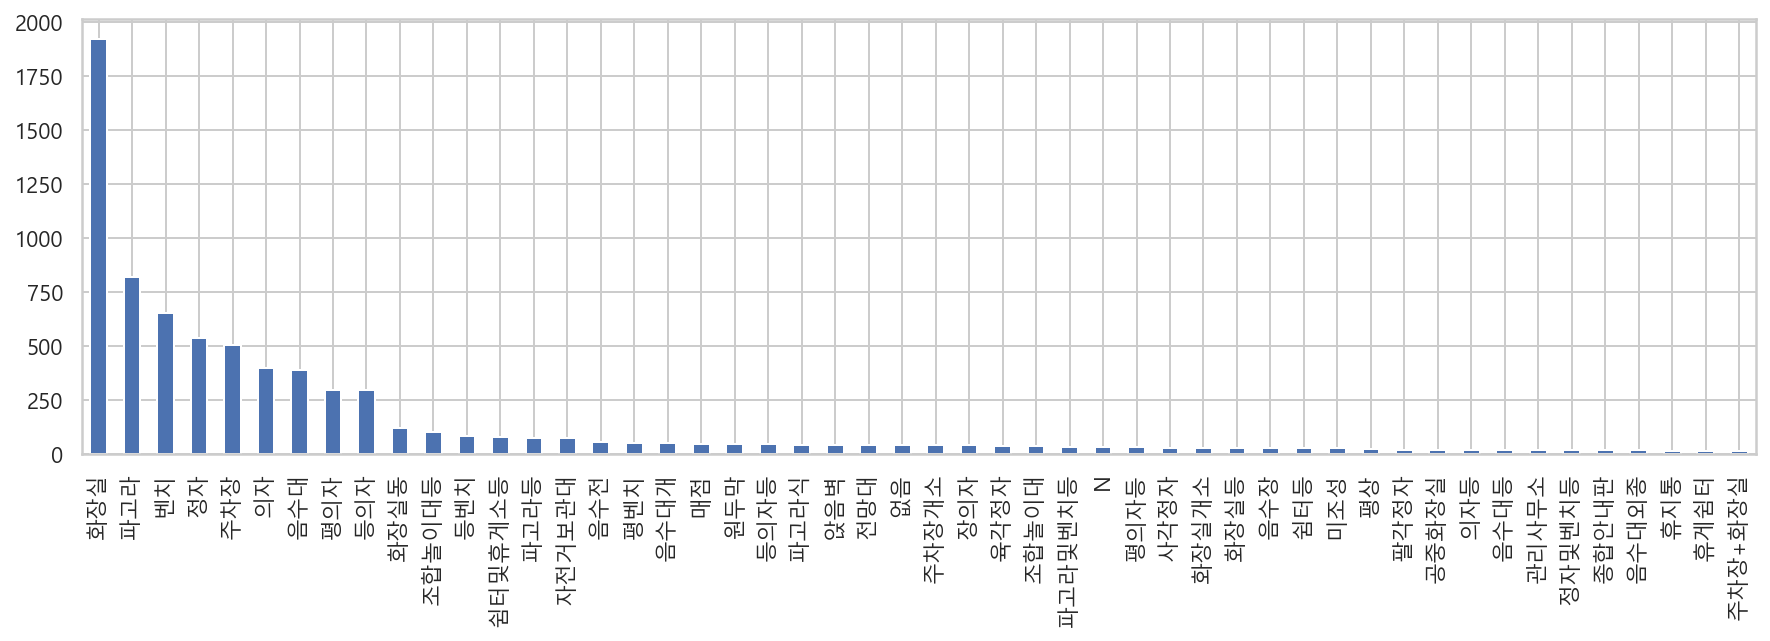

In [54]:
# 상위 50개 단어에 대해 막대그래프를 그려봅니다.
fac_count.head(50).plot.bar(figsize = (15, 4))

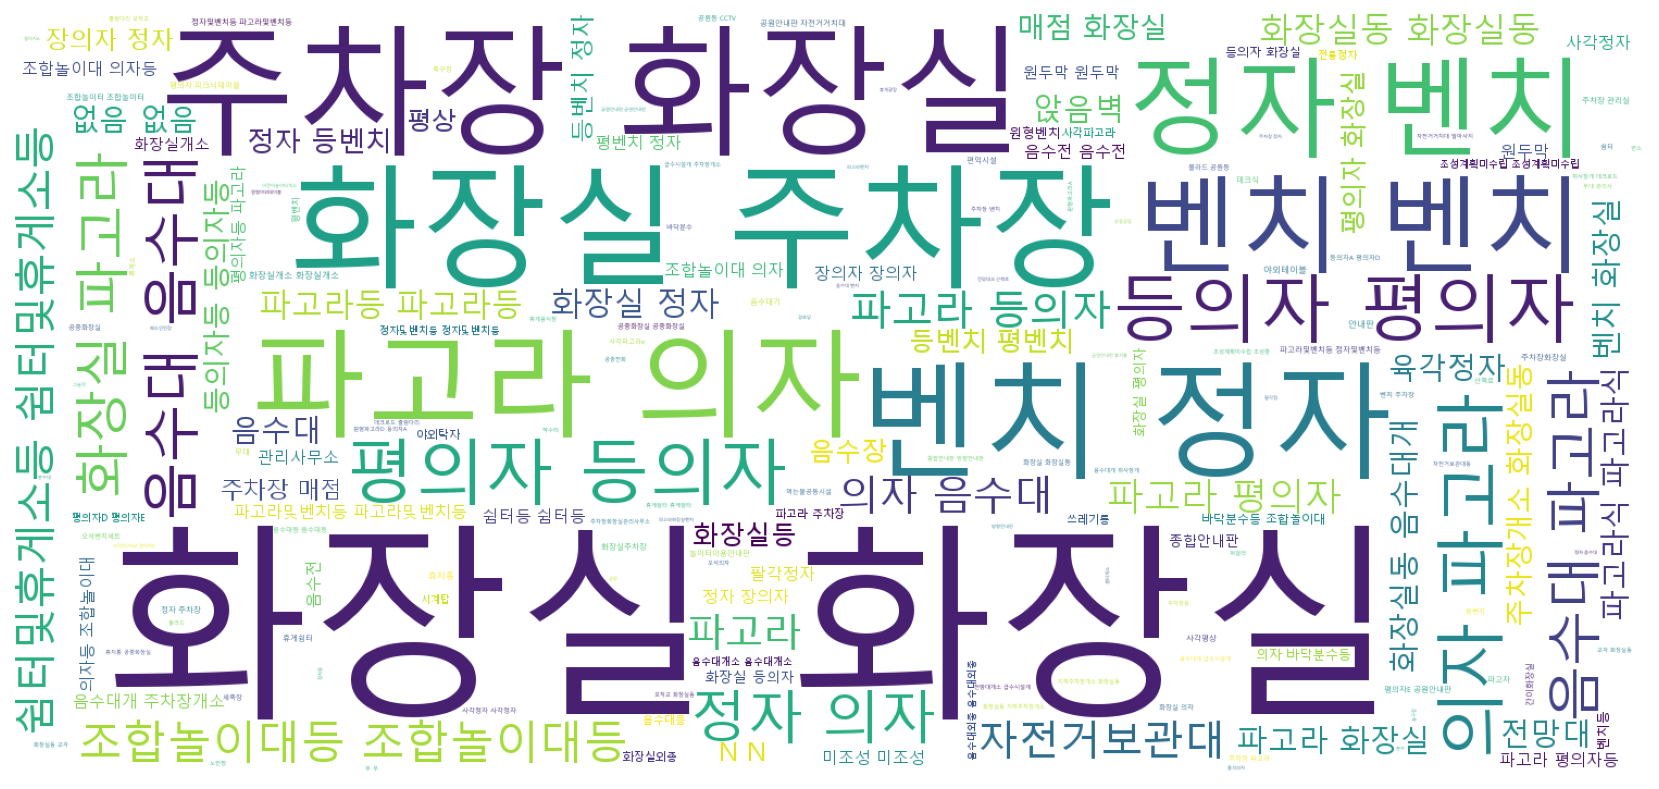

In [55]:
# 편익시설에 대한 워드클라우드를 위에서 정의한 wordcloud 함수로 그려봅니다.
wordcloud(fac, 1500, 700)


### 키워드 별 빈도수 구하기
* 위에서 빈도수를 구해보니 "파고라", "파고라등" 이라는 두 개의 단어가 다른 빈도로 세어졌습니다.
* "화장실"도 "화장실동", "공중화장실" 등 다양한 텍스트가 있는 것을 볼 수 있습니다.
* 일일이 전처리를 해주면 좋지만 데이터 전처리에는 많은 예외가 등장합니다.
* 그래서 때로는 보고자 하는 키워드를 넣고 빈도수를 구하는게 전처리를 하는 작업보다 빠를 때도 있습니다.
* 여기에서는 운동시설이나 편의시설이 있는데 특정 시설을 키워드에 넣고 구하는 방법을 사용해 봅니다.

In [56]:
# "공원보유시설(편익시설)" 에서 문자열 처리를 하기 위해 결측치를 제외한 값을 가져옵니다.
# df_fac 이라는 변수에 담습니다.

facilities = ["화장실", "주차장", "음수대", "파고라", "정자", 
              "벤치", "의자", "놀이터", "축구장", "야영장", "CCTV"]

df_fac = df[df["공원보유시설(편익시설)"].notnull()]

In [57]:
# facilities 내에 있는 값들이 df에 들어있는지 확인하기.
# facilities 리스트에 있는 값으로 for문을 활용해 컬럼을 만듭니다.
# 해당 단어가 포함되면 True, 아니면 False로 값이 표현되도록 합니다.

for fac in facilities:
    df[fac] = df['공원보유시설(편익시설)'].str.contains(fac)

In [58]:
# facilities 리스트로 만든 각 컬럼의 빈도수를 구합니다. 

df[facilities]
df[facilities].sum().sort_values(ascending = False)

화장실     2208.0
파고라     1032.0
의자       949.0
벤치       850.0
정자       648.0
주차장      611.0
음수대      493.0
놀이터       21.0
CCTV       6.0
축구장        6.0
야영장        3.0
dtype: float64

```이렇게 구하고자 하는 값을 따로 리스트로 만들어주고 
이 값이 포함되어있는지에 따라 빈도수를 구하는 것이 위에서 구한 것보다 더 정확하다.```

## 특정 정보 마스킹
### 전화번호 마스킹

In [59]:
# 가운데가 4자리일 때 번호 마스킹 "010-1234-5678"
# re.sub("규칙", "패턴", "데이터")
# 규칙
# (\d{3}) 는 숫자 3자리를 의미합니다.
# (\d{1,2}) 는 숫자 1~2자리를 의미합니다.
# 패턴
# r"\1-\2**-**\5" 의 "\숫자"는 앞에서 () 안에 정의한 값의 순서를 의미합니다. 
# 변수의 순서라고 생각해도 됩니다.
# 여기에서 \3, \4는 쓰지 않고 * 로 대체했습니다.
# r은 raw를 의미합니다.

re.sub("(\d{3})-(\d{2})(\d{2})-(\d{2})(\d{2})", r"\1-\2**-**\5", "010-1234-5678")

'010-12**-**78'

In [60]:
# 가운데가 3자리일 때 번호 마스킹이 잘 동작하는지 확인 "010-123-5678"

ex1 = re.sub("(\d{3})-(\d{1,2})(\d{2})-(\d{2})(\d{2})", r"\1-\2**-**\5", "010-123-5678")
print(ex1)
ex2 = re.sub("(\d{3})-(\d{1,2})(\d{2})-(\d{2})(\d{2})", r"\1-\2**-**\5", "010-1234-5678")
print(ex2)

010-1**-**78
010-12**-**78


In [61]:
# 가운데가 2자리일 때는 마스킹 없이 보이는지 확인하기 "010-12-5678" 
re.sub("(\d{3})-(\d{1,2})(\d{2})-(\d{2})(\d{2})", r"\1-\2**-**\5", "010-12-5678") # 패턴이 맞지 않아 마스킹처리가 안됨.

'010-12-5678'

In [62]:
# 국가 번호가 들어갈 때 확인하기 "+82-10-1234-5678"
# - 가 들어가거나 여러 예외사항이 있을 때 마스킹 되지 않을 수 있음 그렇다면 함수를 만들어서 해결해 보기



In [63]:
# 함수를 통해 가운데 들어오는 번호를 마스킹 하도록 처리
# 국제번호, 국가 번호 등 다양한 형식의 번호가 들어왔을 때 
# - 를 기준으로 뒤에서 두 번째 항목을 마스킹 처리 하되, 
# 마지막 자리는 앞 두자리만 마스킹 합니다.
# 함수명은 mask_phone_number 로 합니다.

phone = "+82-10-1234-5678"

def mask_phone_number(phone):
    
    if pd.isnull(phone):  # 결측치 오류 안나게 하기 위해
        return(phone)
    
    num = phone.split("-")
    leng = len(num) // 2
    
    num[leng] = re.sub("\w", "*", num[leng])
    num[-1] = re.sub("(\w{2})(\w{2})", r"**\2", num[-1])
    
    number = "-".join(num)
    return number


mask_phone_number(phone)

'+82-10-****-**78'

In [64]:
# 결측치가 들어갔을 때 오류가 날 수 있기 때문에 결측치를 체크합니다.
mask_phone_number(np.nan)

nan

In [65]:
# 위에서 만든 함수를 map을 통해 "전화번호" 컬럼에 적용하여 전화번호(전처리) 라는 컬럼을 새로 만들기.

df["전화번호(전처리)"] = df["전화번호"].map(mask_phone_number)
df[["전화번호", "전화번호(전처리)"]].sample(5)

전화번호     전화번호(전처리)
8822   062-360-7512  062-***-**12
15063  031-481-2468  031-***-**68
13404  042-608-5134  042-***-**34
8275   055-230-4504  055-***-**04
14976  031-481-5436  031-***-**36

### 이메일 주소 마스킹
* 해당 데이터에는 이메일 주소가 없지만 정규표현식을 더 연습해 보기 위해 이메일주소도 마스킹처리를 해봅니다.

In [66]:
# 이메일 주소의 형식만 남기고 모두 마스크처리 합니다.
email = "address@mail.com"
re.sub("[^@.]", "x", email) # @와 .을 제외(^)하고 나머지를 x로 바꿔준다.

'xxxxxxx@xxxx.xxx'

In [67]:
# 이메일 주소 아이디의 일부만 마스크처리 합니다. 
# 이 때 맨 앞과 맨 뒤 문자는 그대로 놔두고 나머지 문자에 대해 마스크 처리리를 합니다.
email = "address@mail.com"

address, domain = email.split("@") # address에 주소, domain에 mail.com이 문자열 형태로 들어감.

mask = re.sub("[\w]", "x", address[1:-1])

print(f'{address[0]}{mask}{address[-1]}@{domain}')
print(address[0] + mask + address[-1] + '@' + domain)
print(email)

axxxxxs@mail.com
axxxxxs@mail.com
address@mail.com


In [68]:
# 위에서 작성한 예제를 함수로 만듭니다.
def mask_email(email):
    
    address, domain = email.split("@") # address에 주소, domain에 mail.com이 문자열 형태로 들어감.

    mask = re.sub("[\w]", "x", address[1:-1])

    return f'{address[0]}{mask}{address[-1]}@{domain}'
    
mask_email(email)

'axxxxxs@mail.com'

In [69]:
# "1234address_123@gmail.com"를 마스킹 처리 합니다.
mask_email("1234address_123@gmail.com")

'1xxxxxxxxxxxxx3@gmail.com'

### 자동차 등록번호 마스킹
* 역시나 해당 데이터에는 자동차 등록번호가 없지만 정규표현식을 더 연습해 보기 위해 마스킹처리를 해봅니다.

In [70]:
# 자동차 등록번호를 마스킹 합니다. 
# r'*\2\3**\5' 여기에서 \1 에 해당되는 한글 앞의 숫자는 
# 몇 자리가 들어가든 한글 바로 앞의 마지막 한자리만 봅니다.
# 따라서 앞에 있는 숫자는 마지막 번호만 마스킹 하게 됩니다.
# 13*가1**4 가 출력되도록 만들자.
car_num = "132가1234"

re.sub("([0-9])([가-힣])([\d])([\d]{2})([\d])", r"*\2\3**\5", car_num) # 한글 바로 앞의 마지막 한자리만 보게 하려면 [\d] 혹은 [0-9]
# 혹은 re.sub("(\d{1,})(\d{1})(\w)(\d{1})(\d{2})(\d{1})", r"\1*\3\4**\6", car_num)

'13*가1**4'

In [71]:
# 자동차 등록번호를 마스킹 합니다. 
car_num = "안녕하세요. 자동차 등록 번호는 132가1234 입니다."

re.sub("([0-9])([가-힣])([\d])([\d]{2})([\d])", r"*\2\3**\5", car_num)


'안녕하세요. 자동차 등록 번호는 13*가1**4 입니다.'

# 데이터 요약하기
## 수치형, 범주형 변수 구분하기

In [72]:
# data_types 변수에 데이터 타입만 따로 모으기

data_types = df.dtypes
data_types

관리번호                    object
공원명                     object
공원구분                    object
소재지도로명주소                object
소재지지번주소                 object
위도                     float64
경도                     float64
공원면적                   float64
공원보유시설(운동시설)            object
공원보유시설(유희시설)            object
공원보유시설(편익시설)            object
공원보유시설(교양시설)            object
공원보유시설(기타시설)            object
지정고시일           datetime64[ns]
관리기관명                   object
전화번호                    object
데이터기준일자                 object
제공기관코드                  object
제공기관명                   object
시도                      object
구군                      object
고시연도                   float64
고시월                    float64
편익시설                    object
화장실                     object
주차장                     object
음수대                     object
파고라                     object
정자                      object
벤치                      object
의자                      object
놀이터                     object
축구장     

## 수치형 변수 요약

In [101]:
# 수치형 변수 구하기
# var_numbers 변수에 담습니다.

var_numbers = data_types[data_types != "object"]
var_numbers = var_numbers.index.tolist()
var_numbers

['위도', '경도', '공원면적', '지정고시일', '고시연도', '고시월']

array([[<AxesSubplot:title={'center':'위도'}>,
        <AxesSubplot:title={'center':'경도'}>],
       [<AxesSubplot:title={'center':'공원면적'}>,
        <AxesSubplot:title={'center':'고시연도'}>],
       [<AxesSubplot:title={'center':'고시월'}>, <AxesSubplot:>]],
      dtype=object)

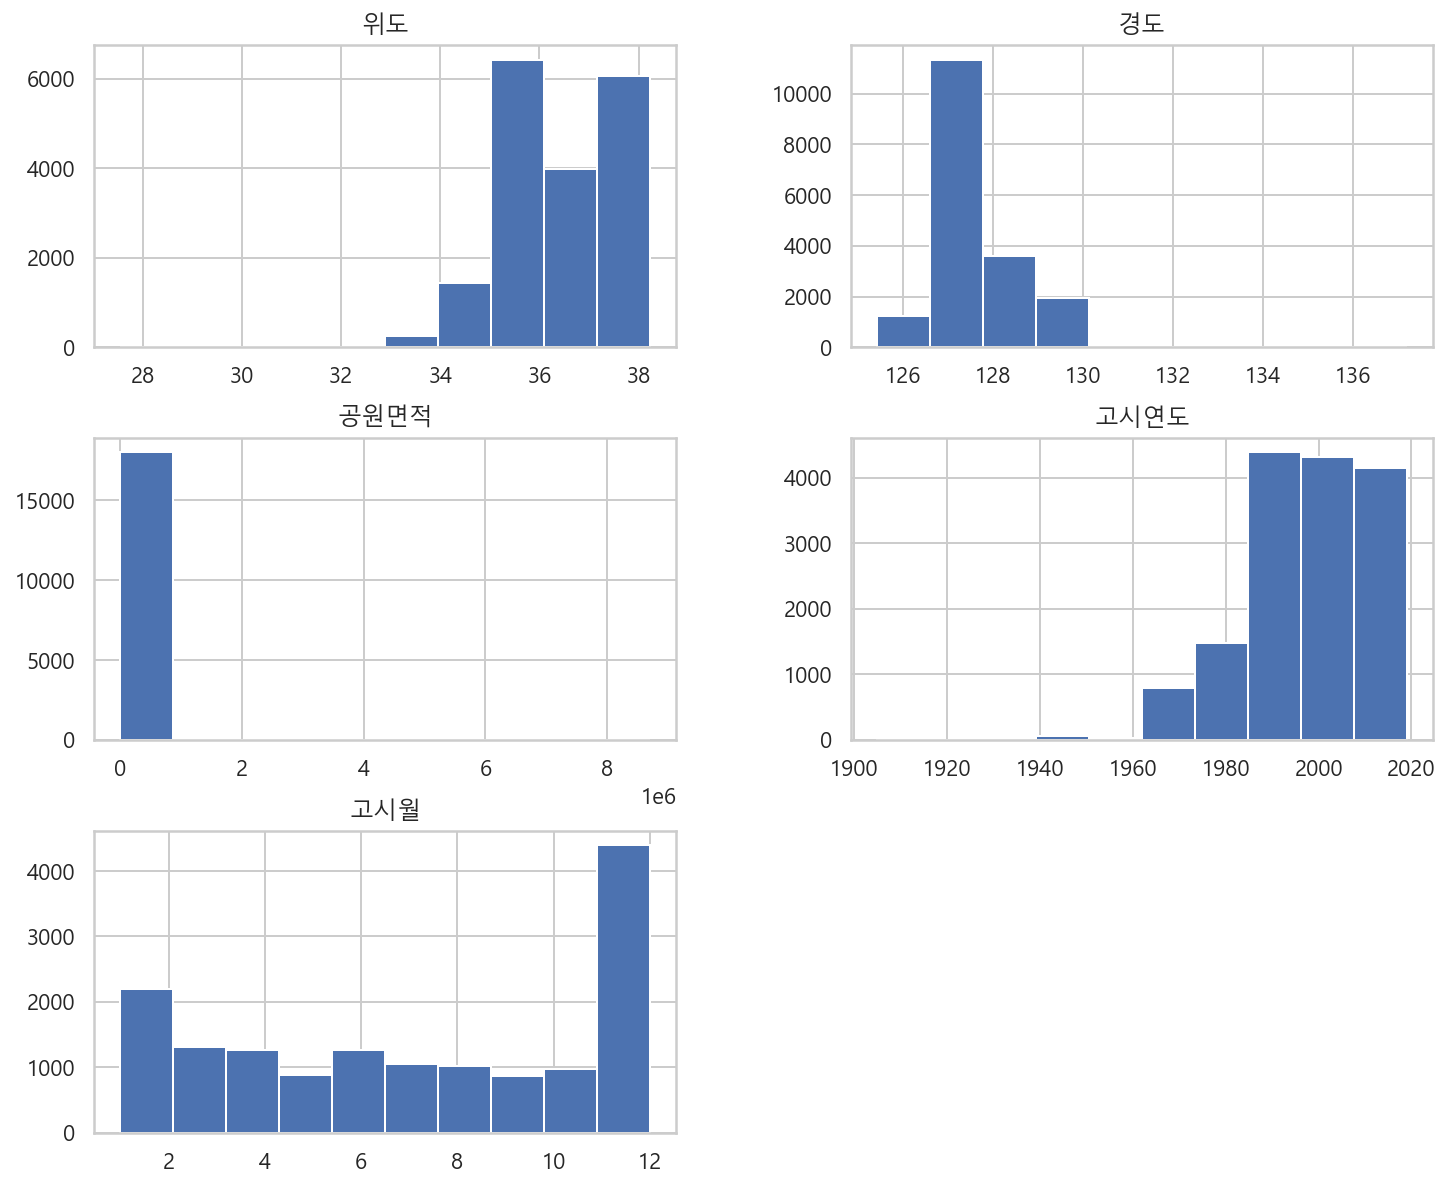

In [74]:
# 히스토그램을 그리면 수치형 변수에 대한 빈도수 분포를 확인할 수 있습니다.
# 빈도수 분포 => 도수 분포표를 시각화 합니다.

df.hist(figsize = (12, 10))

In [75]:
# describe 를 통해 요약합니다.
df.describe() # 기본값은 수치형 데이터들만 요약

위도            경도          공원면적          고시연도           고시월
count  18137.000000  18137.000000  1.813700e+04  15225.000000  15225.000000
mean      36.335922    127.543937  3.781196e+04   1997.238555      7.097274
std        1.051835      0.892670  2.203052e+05     13.592078      3.753724
min       27.551606    125.430955  0.000000e+00   1905.000000      1.000000
25%       35.275430    126.872301  1.503000e+03   1989.000000      4.000000
50%       36.364729    127.130926  2.159000e+03   2000.000000      7.000000
75%       37.404278    128.466193  1.025460e+04   2008.000000     11.000000
max       38.224926    137.202661  8.703000e+06   2019.000000     12.000000

## 범주형 변수 요약

In [76]:
# 범주형 변수 구하기
# var_objects 라는 변수에 저장합니다.

var_objects = data_types[data_types == "object"]
var_objects = var_objects.index.tolist()
var_objects

['관리번호',
 '공원명',
 '공원구분',
 '소재지도로명주소',
 '소재지지번주소',
 '공원보유시설(운동시설)',
 '공원보유시설(유희시설)',
 '공원보유시설(편익시설)',
 '공원보유시설(교양시설)',
 '공원보유시설(기타시설)',
 '관리기관명',
 '전화번호',
 '데이터기준일자',
 '제공기관코드',
 '제공기관명',
 '시도',
 '구군',
 '편익시설',
 '화장실',
 '주차장',
 '음수대',
 '파고라',
 '정자',
 '벤치',
 '의자',
 '놀이터',
 '축구장',
 '야영장',
 'CCTV',
 '전화번호(전처리)']

In [77]:
# 문자열 타입의 데이터 describe 로 요약하기
df[var_objects].describe()
# 혹은 df.describe(include = "object")

관리번호    공원명   공원구분                  소재지도로명주소  \
count         18137  18137  18137                     18137   
unique        14710  12423     10                     15186   
top     31110-60001     공원  어린이공원  전라남도 무안군 삼향읍 남악리 미지정 간척지   
freq            124    145   9987                        18   

                         소재지지번주소 공원보유시설(운동시설) 공원보유시설(유희시설) 공원보유시설(편익시설)  \
count                      17158         4845         6964         5084   
unique                     14419         1485         1237         1102   
top     전라남도 무안군 삼향읍 남악리 미지정 간척지         운동기구        조합놀이대          화장실   
freq                          18          360         1526         1037   

       공원보유시설(교양시설) 공원보유시설(기타시설)      관리기관명          전화번호     데이터기준일자  \
count          1160         3116      17383         16957       18137   
unique          378          993        279           497         112   
top               -            -  경상남도 창원시청  055-212-4501  2019-09-24   
freq            250          141       1176           344        1344   

         제공기관코드     제공기관명     시도     구군  편익시설    화장실    주차장    음수대    파고라  \
count     18137     18137  18137  18137  5084   5084   5084   5084   5084   
unique      219       219     17    232   730      2      2      2      2   
top     5670000  경상남도 창원시    경기도    창원시   화장실  False  False  False  False   
freq       1176      1176   3318   1176  1086   2876   4473   4591   4052   

           정자     벤치     의자    놀이터    축구장    야영장   CCTV     전화번호(전처리)  
count    5084   5084   5084   5084   5084   5084   5084         16957  
unique      2      2      2      2      2      2      2           395  
top     False  False  False  False  False  False  False  055-***-**01  
freq     4436   4234   4135   5063   5078   5081   5078           696

## crosstab
* 범주형 변수끼리의 빈도수 구하기

In [78]:
# 관리기관명과 공원구분에 따른 빈도수를 구합니다.
# 결과가 많기 때문에 "체육공원"을 5개 이상 관리하는 기관명만 따로 뽑습니다.
# 숫자의 많고 적음 표시를 위해 style.background_gradient() 를 사용합니다.
# 결과를 manage_category 변수에 담습니다.

manage_category = pd.crosstab(index = df["관리기관명"], columns = df["공원구분"])
manage_category[manage_category["체육공원"] >= 5].style.background_gradient()

In [79]:
# "시도" 별 "공원구분" 의 수를 구합니다.
city_category = pd.crosstab(index = df["시도"], columns = df["공원구분"])
city_category.style.background_gradient()

# 시도별 공원 분포

## 시도별 공원 비율

In [80]:
# 시도별로 합계 데이터를 출력
# 밑에서 두 데이터를 합칠거라서 df로 변환해줌.
city_count = pd.DataFrame(df["시도"].value_counts())
city_prob = pd.DataFrame(df["시도"].value_counts(normalize = True))
city_prob

시도
경기도      0.182941
전라남도     0.103766
경상남도     0.100623
서울특별시    0.096212
충청남도     0.094999
전라북도     0.062690
경상북도     0.050560
충청북도     0.049567
울산광역시    0.048906
인천광역시    0.037217
부산광역시    0.036004
강원도      0.035728
대구광역시    0.032310
대전광역시    0.027403
광주광역시    0.023653
제주특별자치도  0.013563
세종특별자치시  0.003860

In [81]:
# 합계와 비율을 같이 보여주도록 데이터를 병합하자.
# city 라는 변수에 담습니다.

city = pd.concat([city_count, city_prob], axis = 1)
city.columns = ["합계", "비율"]
city.style.background_gradient()

## 공원구분별 분포

<AxesSubplot:xlabel='경도', ylabel='위도'>

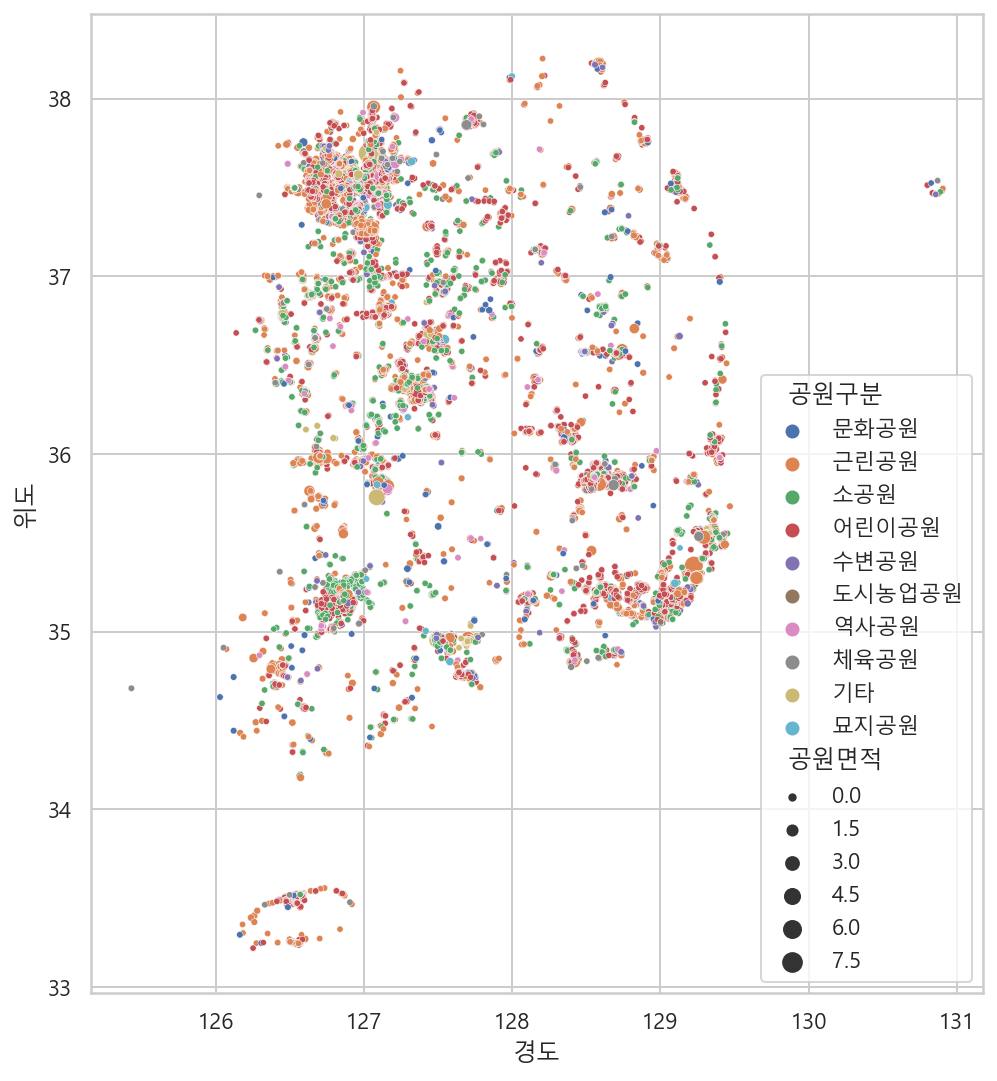

In [82]:
# "공원구분"별로 색상을 다르게 표현하고 "공원면적"에 따라 원의 크기를 다르게 그립니다.
# 제주도는 해안선과 유사한 모습으로 공원이 배치되어 있는 모습이 인상적입니다.
# df에는 전체 데이터 프레임이 df_park 에는 위경도의 이상치를 제거한 데이터가 들어있습니다.

plt.figure(figsize = (8, 9))
sns.scatterplot(data = df_park, x = "경도", y = "위도", hue = "공원구분",
               size = "공원면적", sizes = (10, 100))  # sizes : size 범위

## 시도별 공원분포

<AxesSubplot:xlabel='경도', ylabel='위도'>

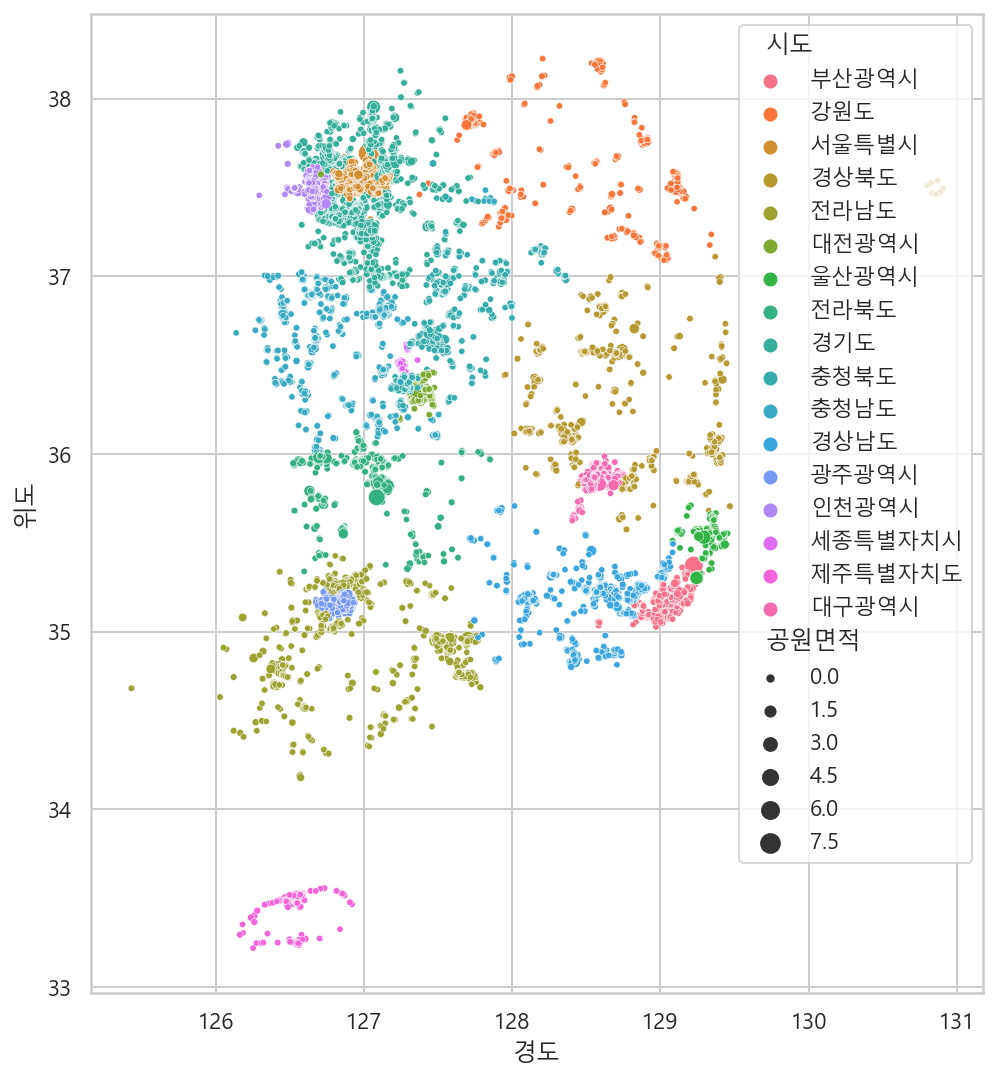

In [83]:
# 시도별로 scatterplot 의 색상을 다르게 표현하고 공원면적에 따라 원의 크기를 다르게 그립니다.

plt.figure(figsize = (8, 9))
sns.scatterplot(data = df_park, x = "경도", y = "위도", hue = "시도",
               size = "공원면적", sizes = (10, 100))  # sizes : size 범위

color map : https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html

<AxesSubplot:xlabel='count', ylabel='시도'>

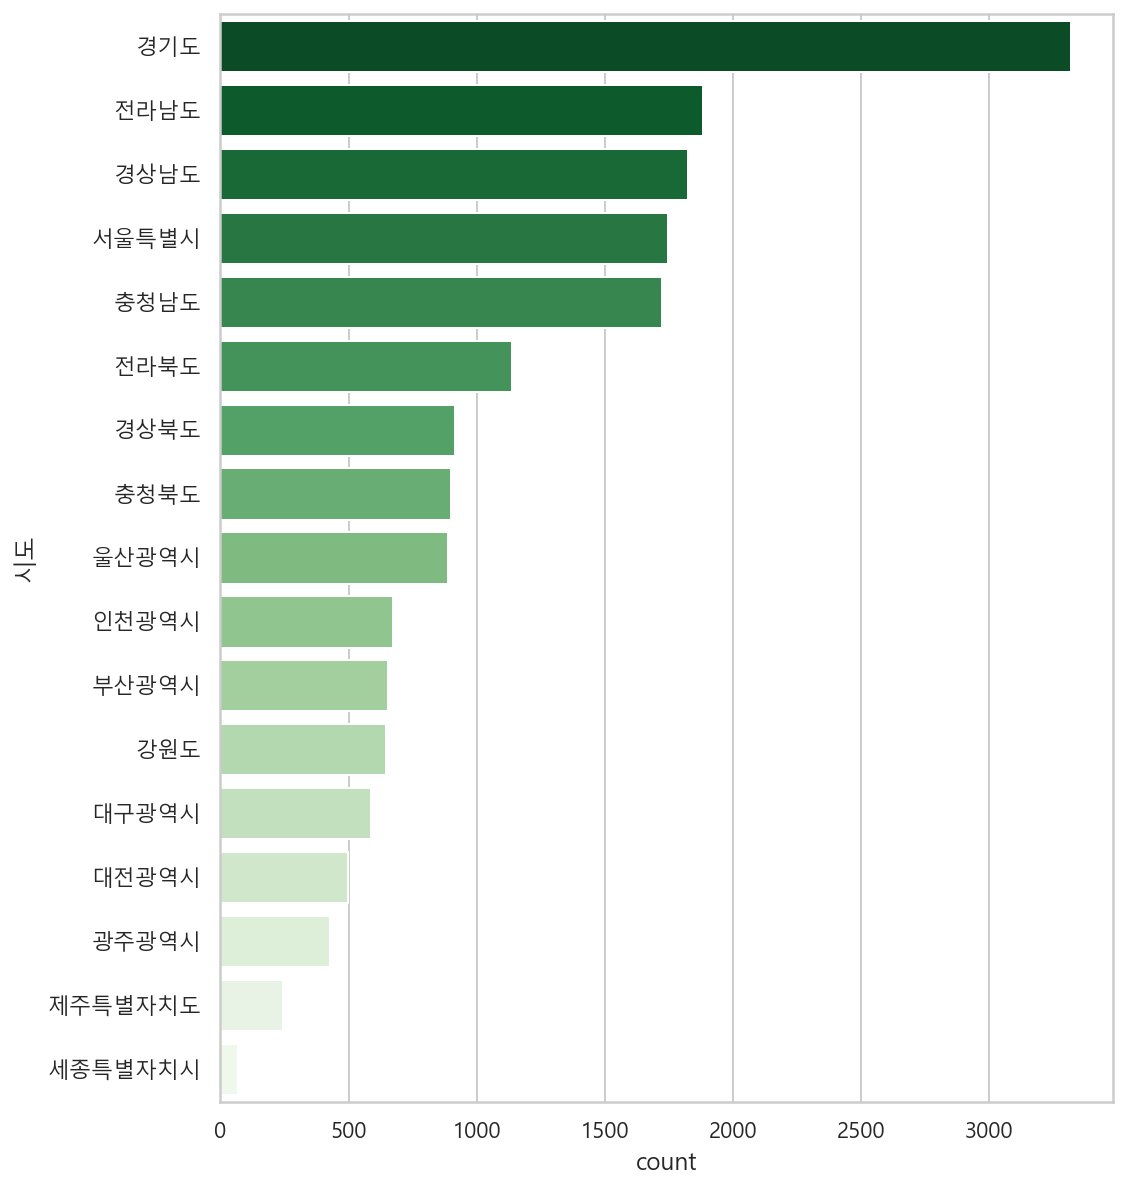

In [84]:
# countplot 으로 시도별 빈도수를 그립니다.
plt.figure(figsize = (8, 10))
g = sns.countplot(data = df, y = "시도", palette = "Greens_r", order = city_count.index) # city_count는 앞에서 구한 시도명에 따른 빈도수
g

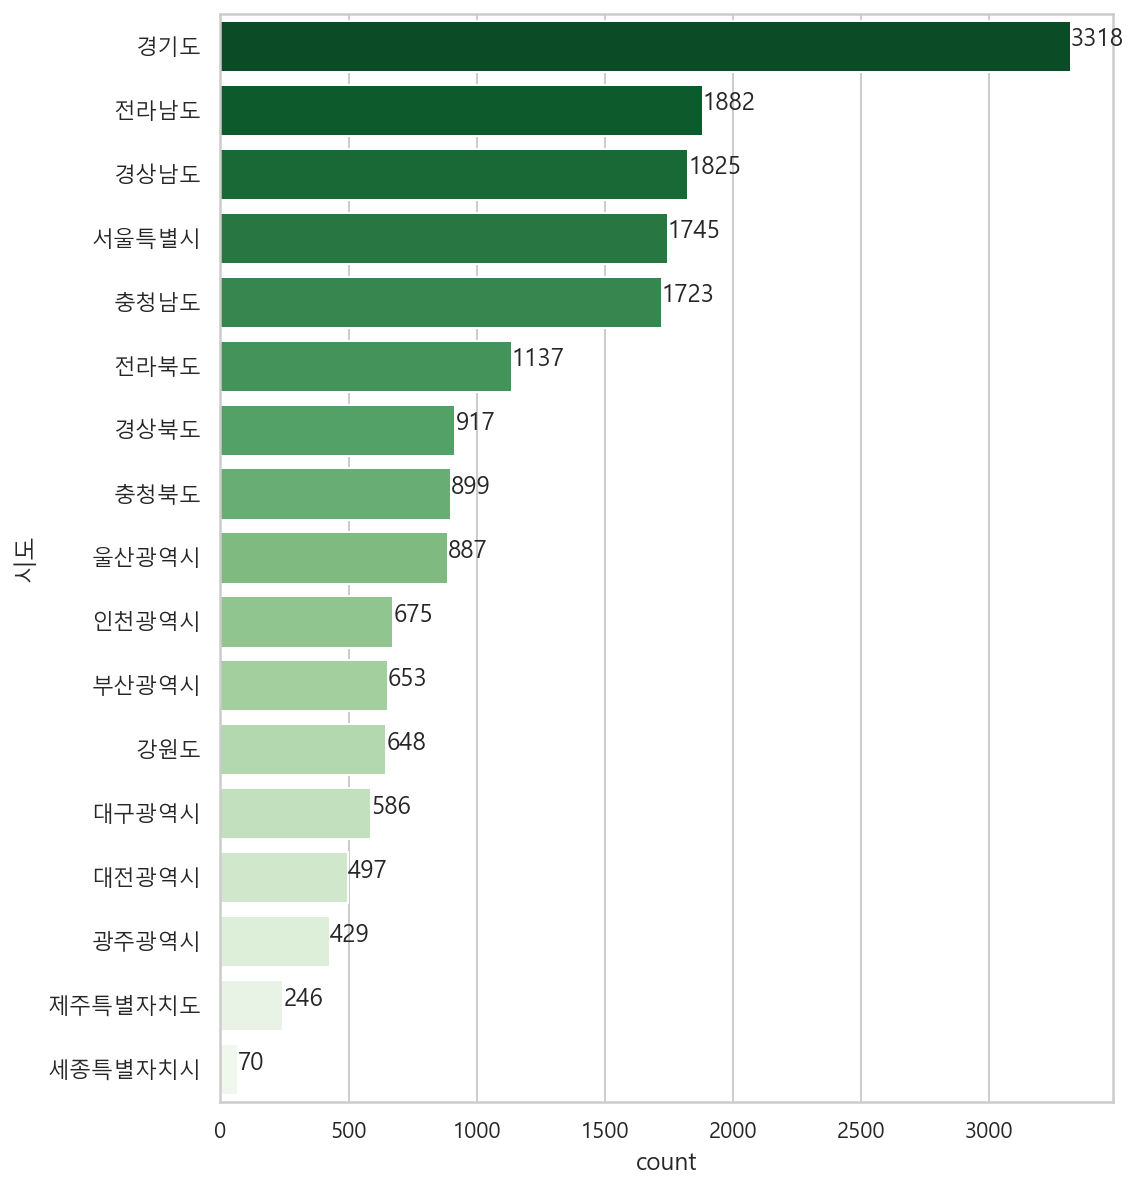

In [85]:
# 숫자도 표시해주기

plt.figure(figsize = (8, 10))
g = sns.countplot(data = df, y = "시도", palette = "Greens_r", order = city_count.index) # city_count는 앞에서 구한 시도명에 따른 빈도수
numb = 0
for i in city_count.index:
    count = city_count.loc[i, "시도"] 
    g.text(x = count, y = numb, s = count)
    numb += 1
    

## 특정 공원구분 가져오기

In [86]:
# "공원구분"별로 빈도수를 구합니다.
df["공원구분"].value_counts()

어린이공원     9987
근린공원      4170
소공원       2647
문화공원       322
수변공원       301
기타         260
체육공원       230
역사공원       164
묘지공원        43
도시농업공원      13
Name: 공원구분, dtype: int64

In [108]:
# str.match를 통해 특정 텍스트가 들어가는 공원만 가져오기
# ".*"는 앞뒤로 어떤 문자가 등장하든 상관없다는 의미입니다.
# . : 모든문자, * : 0번이상 반복
# 따라서 아래의 정규표현식 대신 r'(역사|체육|수변|문화)공원'를 사용해도 똑같이 동작합니다.
park_type = r'.*((역사|체육|수변|문화)공원).*'

park = df[df["공원구분"].str.match(park_type)]
park.shape

(1017, 36)

In [102]:
# 위에서 정의한 var_numbers 라는 변수를 가져와 출력해 봅니다.

var_numbers

['위도', '경도', '공원면적', '지정고시일', '고시연도', '고시월']

In [103]:
# 리스트 다루기 - var_pair 라는 변수에 리스트를 만들어서 값을 추가하고 삭제해 봅니다.
# 기존 리스트에 "공원구분" 원소 추가하기 "공원구분"에 따라 색상을 다르게 표현해 보기 위함
# var_pair 라는 변수에 담습니다. 

var_pair = var_numbers
var_pair.append("공원구분")
var_pair

['위도', '경도', '공원면적', '지정고시일', '고시연도', '고시월', '공원구분']

In [105]:
# 기존 리스트의 원소를 제거하기 - '지정고시일', '고시연도', '고시월'
# 제거 한 후 다시 제거하려고 하면 다음과 같은 오류가 발생할 수 있습니다.
# ValueError: list.remove(x): x not in list
var_pair.remove("지정고시일")
var_pair.remove("고시연도")
var_pair.remove("고시월")
var_pair

['위도', '경도', '공원면적', '공원구분']

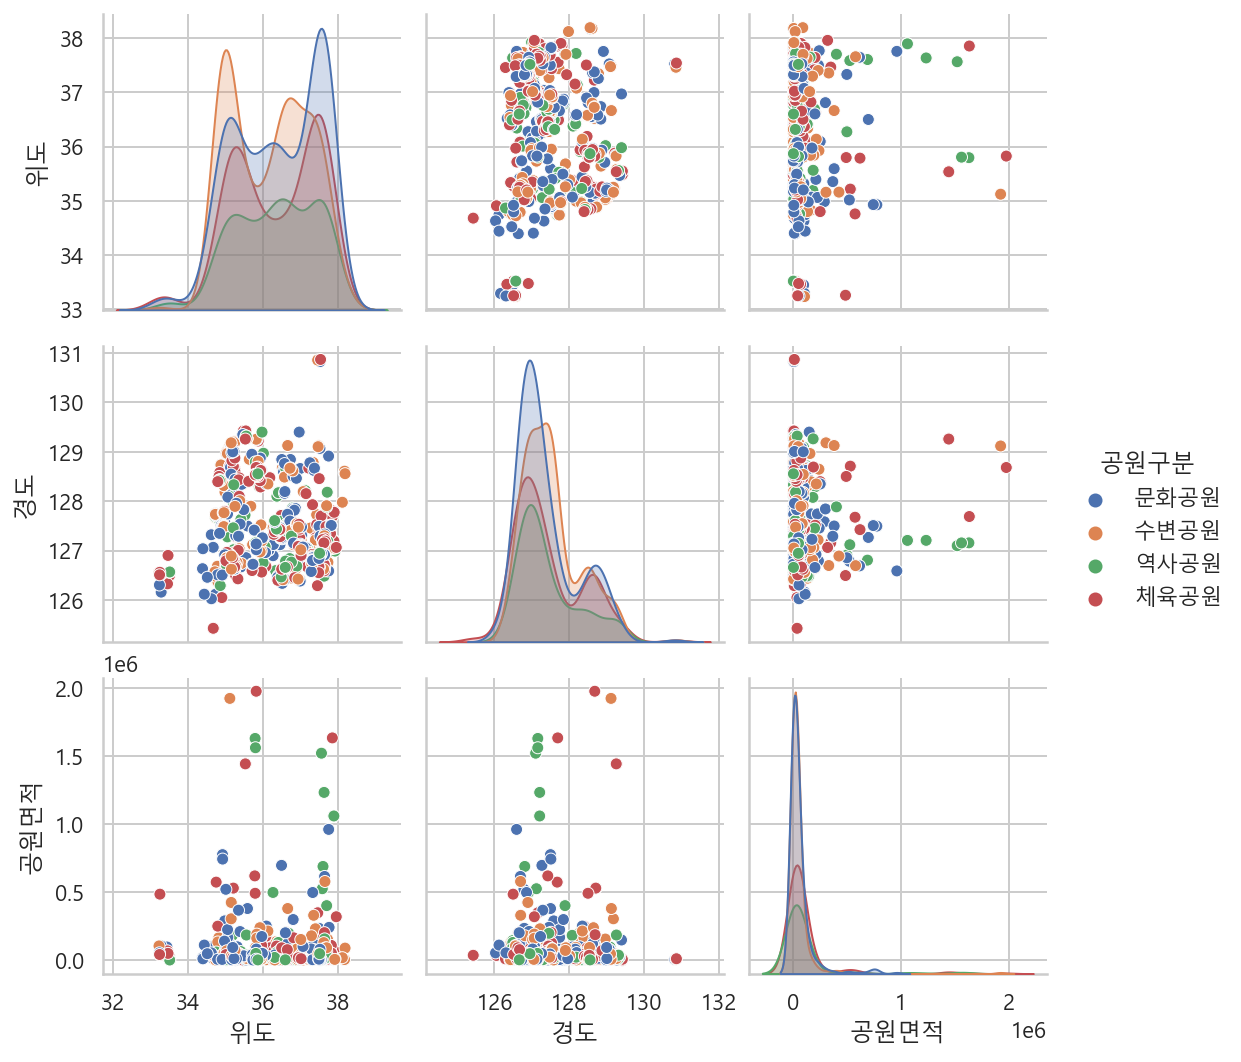

In [110]:
# 위에서 가져온 var_pair 라는 변수에 담긴 리스트에 있는 컬럼을 사용해 pairplot을 그립니다.

sns.pairplot(park[var_pair], hue = "공원구분")

## 피봇테이블로 시도별 공원수와 평균면적 구하기

In [33]:
# 시도별 공원수와 "공원면적" 컬럼의 평균값, 중앙값을 구합니다.
# style.background_gradient()를 사용해서 값의 많고 적음에 따라 다른 색상으로 표현되도록 합니다.

pd.pivot_table(data = df, index = "시도", values = "공원면적", aggfunc = ['count', 'mean', 'median'])\
.style.background_gradient()

## 내가 사는 지역의 공원을 지도에 표시해 보기

In [38]:
# 경기도 성남시에 위치한 공원만 출력해 봅니다.
# df_sn 이라는 변수에 담아서 재사용 합니다.

df_sn = df[(df['시도'] == "경기도") & (df["구군"] == "성남시")]
df_sn.head()

관리번호    공원명  공원구분                  소재지도로명주소  \
2990  41131-00003   삼평공원  근린공원       경기도 성남시 수정구 시흥동 산22   
2991  41131-00004   양지공원  체육공원       경기도 성남시 수정구 양지동 972   
2992  41131-00005   단대공원  근린공원    경기도 성남시 수정구 단대로16번길 25   
2993  41131-00006   영장공원  근린공원     경기도 성남시 수정구 태평동 산50-5   
2994  41131-00007  희망대공원  근린공원  경기도 성남시 수정구 희망로 509번길 20   

                    소재지지번주소         위도          경도      공원면적   공원보유시설(운동시설)  \
2990    경기도 성남시 수정구 시흥동 산22  37.422935  127.110023  545926.0  다목적운동장, 야외운동장   
2991    경기도 성남시 수정구 양지동 972  37.463643  127.163643  348806.5    테니스장, 실내체육관   
2992    경기도 성남시 수정구 단대동 193  37.454788  127.158822  210700.0     궁도장, 신체단련장   
2993  경기도 성남시 수정구 태평동 산50-5  37.450071  127.133856  394759.3     게이트볼장, 농구장   
2994   경기도 성남시 수정구 신흥동 2345  37.449303  127.150186  122083.0     농구장, 배드민턴장   

      공원보유시설(유희시설)  ...      지정고시일    관리기관명          전화번호     데이터기준일자  \
2990        어린이놀이터  ... 1972-11-03  성남시 공원과  031-729-4272  2020-01-17   
2991   과학놀이터, 놀이마당  ... 1972-11-03  성남시 공원과  031-729-4272  2020-01-17   
2992     물놀이장, 놀이터  ... 1974-08-31  성남시 공원과  031-729-4272  2020-01-17   
2993        어린이놀이터  ... 1972-11-03  성남시 공원과  031-729-4272  2020-01-17   
2994  어린이놀이터, 물놀이장  ... 1972-11-03  성남시 공원과  031-729-4272  2020-01-17   

       제공기관코드    제공기관명   시도   구군    고시연도   고시월  
2990  3780000  경기도 성남시  경기도  성남시  1972.0  11.0  
2991  3780000  경기도 성남시  경기도  성남시  1972.0  11.0  
2992  3780000  경기도 성남시  경기도  성남시  1974.0   8.0  
2993  3780000  경기도 성남시  경기도  성남시  1972.0  11.0  
2994  3780000  경기도 성남시  경기도  성남시  1972.0  11.0  

[5 rows x 23 columns]

In [ ]:
# "시도", "구군", "공원명" 컬럼만 미리보기 합니다.



### 특정 공원 정보 찾아보기
* 판교의 화랑공원을 찾아봅니다.

In [42]:
# str.contains 로 "공원명"에 "화랑"이 들어가는 데이터를 찾습니다.

df_sn[df_sn["공원명"].str.contains("화랑")]

관리번호          공원명  공원구분               소재지도로명주소  \
3077  41135-00034  판교제8호(화랑)공원  근린공원  경기도 성남시 분당구 대왕판교로 609   

                  소재지지번주소         위도          경도      공원면적  공원보유시설(운동시설)  \
3077  경기도 성남시 분당구 삼평동 637  37.397084  127.106226  119018.2  체력단련장, 배드민턴장   

     공원보유시설(유희시설) 공원보유시설(편익시설)  공원보유시설(교양시설) 공원보유시설(기타시설)      지정고시일    관리기관명  \
3077          NaN          음수전  생태학습원, 야외음악당          NaN 2004-12-30  성남시 공원과   

              전화번호     데이터기준일자   제공기관코드    제공기관명   시도   구군    고시연도   고시월  
3077  031-729-4382  2020-01-17  3780000  경기도 성남시  경기도  성남시  2004.0  12.0

In [46]:
# cols 컬럼에 특정 컬럼만 불러와서 봅니다.
# '공원보유시설(운동시설)', '공원보유시설(유희시설)', '공원보유시설(편익시설)', '공원보유시설(교양시설)' 

col = '공원보유시설(운동시설)	공원보유시설(유희시설)	공원보유시설(편익시설)	공원보유시설(교양시설)'
col = col.split("\t")
df_sn.loc[df_sn["공원명"].str.contains("화랑"), col]

공원보유시설(운동시설) 공원보유시설(유희시설) 공원보유시설(편익시설)  공원보유시설(교양시설)
3077  체력단련장, 배드민턴장          NaN          음수전  생태학습원, 야외음악당

###  지도에 표현하기
* 다음의 문서를 활용해서 지도를 표현합니다.
* https://nbviewer.jupyter.org/github/python-visualization/folium/blob/master/examples/Quickstart.ipynb
* Folium 사용예제 :
http://nbviewer.jupyter.org/github/python-visualization/folium/tree/master/examples/

In [63]:
# folium 으로 지도에 표현해 봅니다.
# 지도에서 한글이 깨지면 html 문서로 저장해서 보세요
lat = df_sn["위도"].mean()
long = df_sn["경도"].mean()

import folium

m = folium.Map([lat, long], zoom_start = 13)

for i in df_sn.index:
    sub_lat = df_sn.loc[i, "위도"]
    sub_long = df_sn.loc[i, "경도"]
    tooltip = df_sn.loc[i, "공원명"] + " - " + df_sn.loc[i, "소재지도로명주소"]
    
    if df_sn.loc[i, "공원명"] == "판교제8호(화랑)공원":
         folium.Marker([sub_lat, sub_long], tooltip = tooltip,
                      icon = folium.Icon(color = 'red')).add_to(m)
        
    else:
        folium.Marker([sub_lat, sub_long], tooltip = tooltip).add_to(m)

m
    

In [59]:
df_sn.loc[2990, "공원명"] == "화랑공원"

False

In [56]:
df_sn.index

Int64Index([2990, 2991, 2992, 2993, 2994, 2995, 2996, 2997, 2998, 2999,
            ...
            3174, 3175, 3176, 3177, 3178, 3179, 3180, 3181, 3182, 3183],
           dtype='int64', length=194)